In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import random
from math import sqrt
import numpy as np
import tqdm
from collections import defaultdict
import copy

# Zadanie 1 Model Schellinga

In [2]:
# class Agent():
#     def __init__(self, type_a):
#         self.type_a = type_a
        
    
class Schelling():
    def __init__(self, size, p, alfa=4, types_count=2):
        self.size = size
        self.MOORE_OFFSETS = [(1, 1), (1, -1), (1, 0), (-1, 0), (-1, 1), (-1, -1), (0, 1), (0, -1)]
        self.alfa = alfa
        self.p = p
        self.types_count = types_count
        
        empty_ration = 1 - p
        
        probabilities = [p / types_count for _ in range(types_count)]
        probabilities = [empty_ration] + probabilities
        choices = [0] + [type_a for type_a in range(1, types_count + 1)]
        self.mat = np.random.choice(choices, size=(size, size), p=probabilities)
        self.starting_mat = copy.deepcopy(self.mat)
        self.average_si = []
        
    def run(self, iterations_count):
        self.iterations_count = iterations_count
        for i in tqdm.tqdm(range(iterations_count)):
            self.step()
                
    def step(self):
        next_places = defaultdict(list)
        self.sis = []
        
        for (row, col), value in np.ndenumerate(self.mat):
            if value != 0:
                empty_places = self.get_empty_moore_neighbour(row, col)
                if empty_places:
                    next_places[random.choice(empty_places)].append((row, col))
                    
        next_places = {new_place: old_place[0] for new_place, old_place in next_places.items() if len(old_place) == 1}
        self.average_si.append(np.mean(self.sis))                
        for (new_row, new_col), (row, col) in next_places.items():
            self.mat[new_row, new_col], self.mat[row, col] = self.mat[row, col], self.mat[new_row, new_col]
                
    
    def get_empty_moore_neighbour(self, row, col):
        type_a = self.mat[row, col]
        places = [((row+dr) % self.size, (col+dc) % self.size) for (dr, dc) in self.MOORE_OFFSETS]
        len_places = len([place for place in places if self.mat[place] == type_a])
        self.sis.append(len_places)
        if len_places < self.alfa:
            places = [((row+dr) % self.size, (col+dc) % self.size) for (dr, dc) in self.MOORE_OFFSETS]
            return [place for place in places if self.mat[place] == 0]
    
    def plot(self, figsize=(18, 9)):
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = figsize) 
        fig.suptitle(f'MOORE alfa={self.alfa}, p={self.p}, {self.size}x{self.size}')
        img1 = ax1.imshow(self.starting_mat, interpolation="nearest", vmin = 0,vmax = self.types_count)
        ax1.set_title("Starting")
        img2 = ax2.imshow(self.mat, interpolation="nearest", vmin = 0,vmax = self.types_count)
        ax2.set_title(f"After {self.iterations_count} iterations steps")
        plt.colorbar(img1, ax=ax1)
        plt.colorbar(img2, ax=ax2)
        plt.show()
        plt.figure(figsize=figsize)
        plt.title('Mean similarity ratio by simulation iteration')
        plt.xlabel('simulation iteration')
        plt.ylabel('mean similarity ratio')
        plt.plot([i for i in range(self.iterations_count)], self.average_si)
        plt.show()
        

        
        

## 1. Liczba typów agentów: 2

100%|███████████████████████████████████████| 7000/7000 [00:05<00:00, 1254.22it/s]


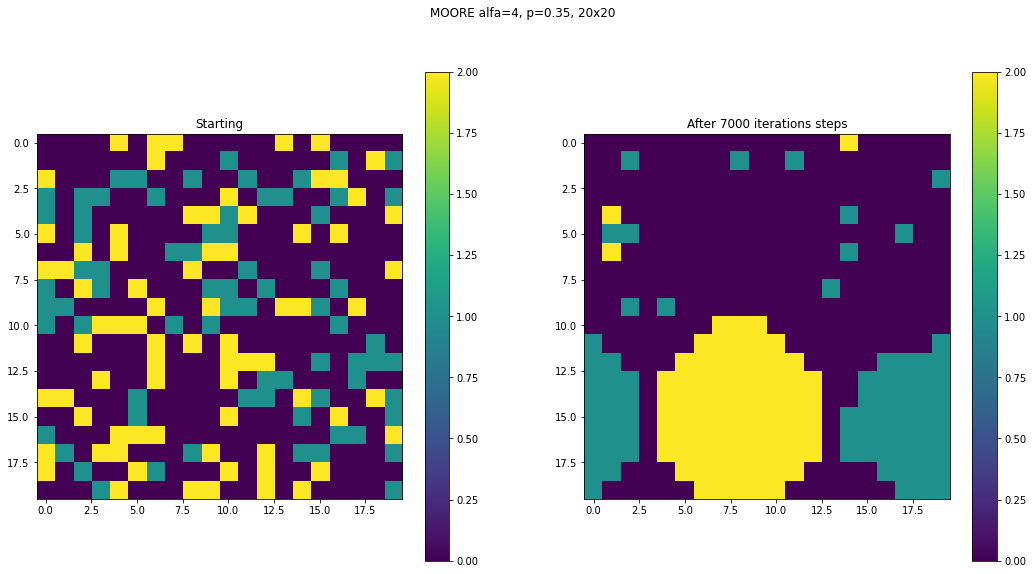

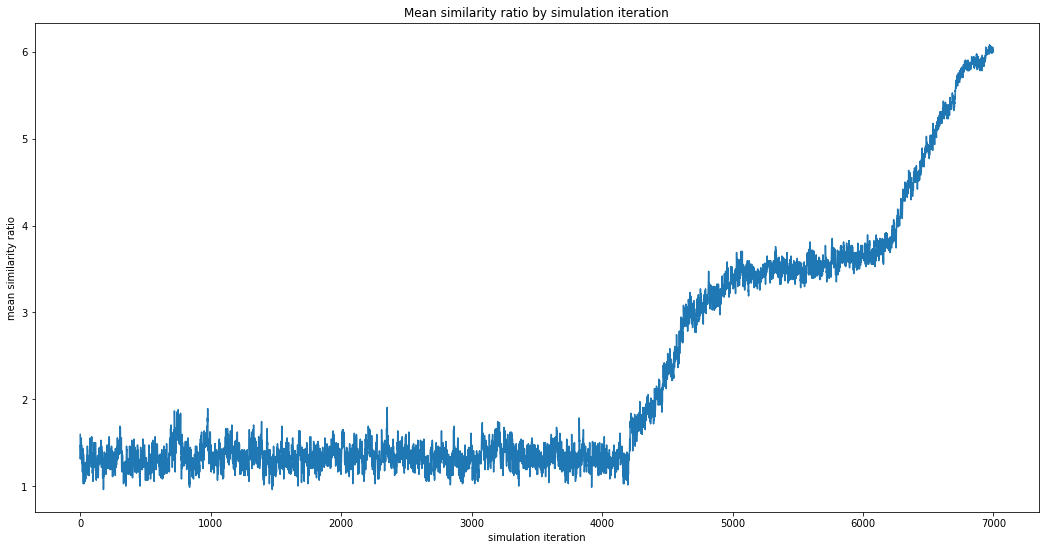

In [55]:
s = Schelling(size=20, p=.35, alfa=4, types_count=2)
s.run(7000)
s.plot()

Przy tak małym prawdpodobieństewem, model ma problemy z segregacją modelu. Dopiero przy 4000 iteracji wystartował i przy 7000 iteracjach było widać segregację agentów

100%|███████████████████████████████████████| 7000/7000 [00:03<00:00, 1849.47it/s]


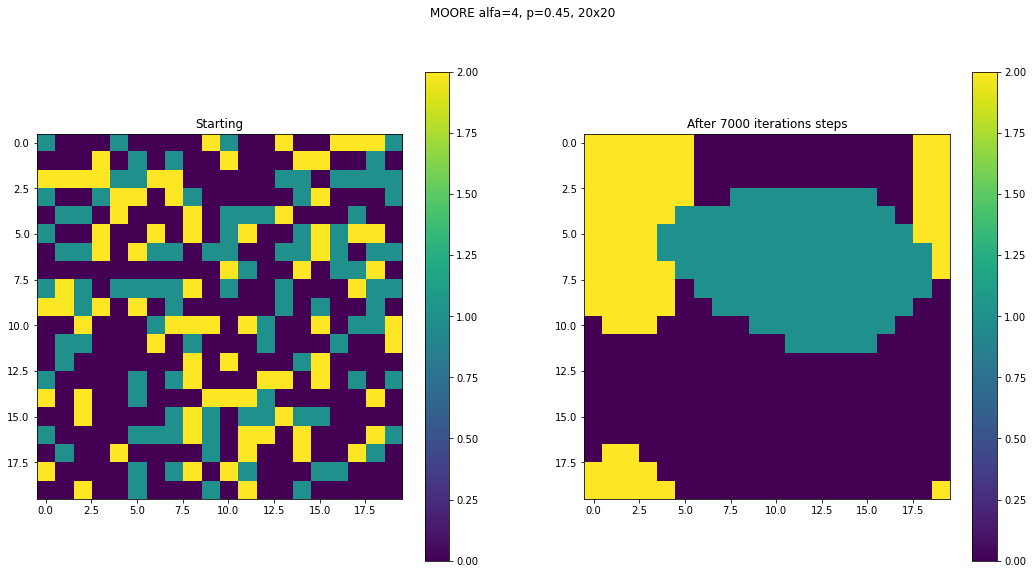

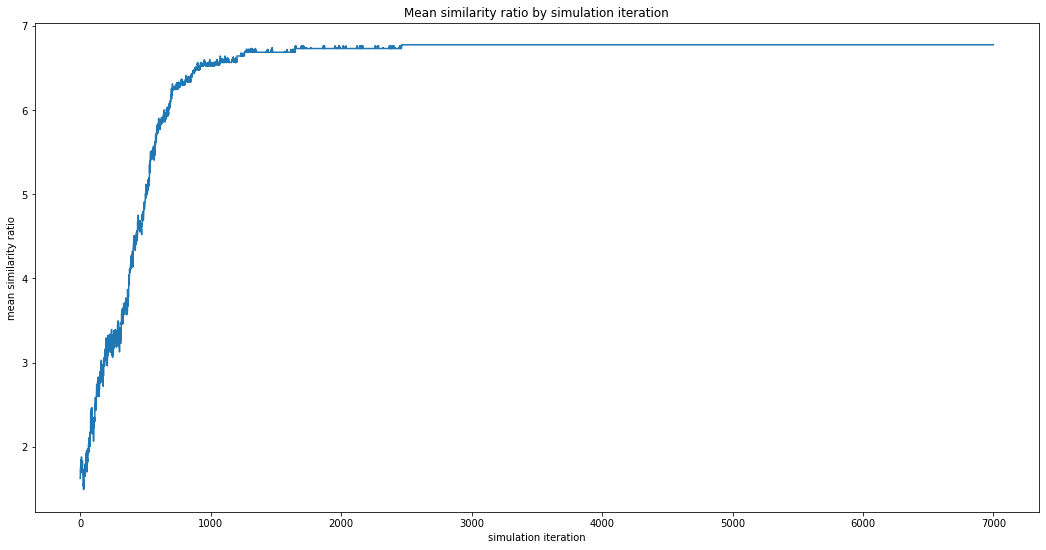

In [56]:
s = Schelling(size=20, p=.45, alfa=4, types_count=2)
s.run(7000)
s.plot()

Model ma dobrą segregacją już po 1000 iteracjach.

100%|███████████████████████████████████████| 7000/7000 [00:04<00:00, 1571.63it/s]


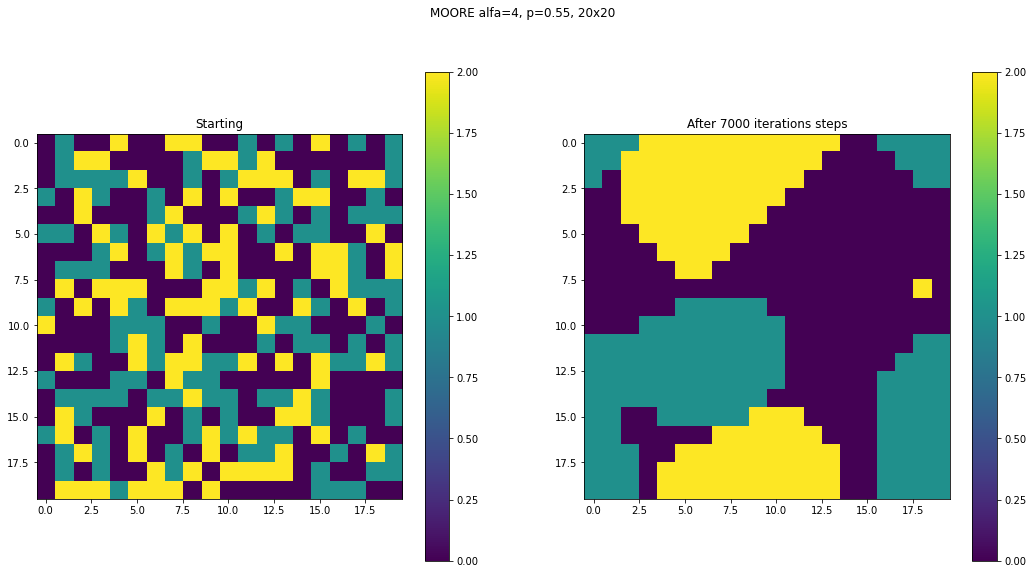

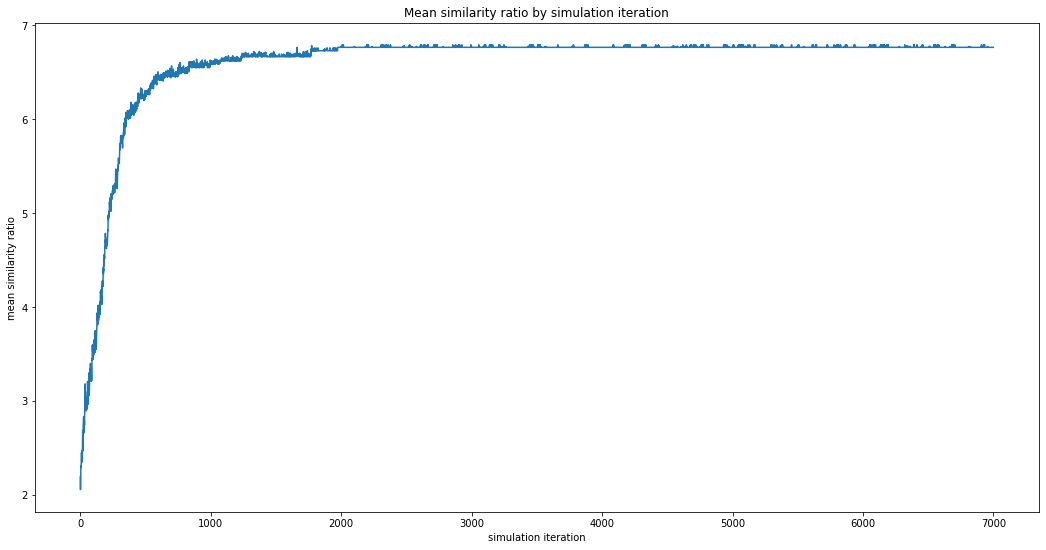

In [57]:
s = Schelling(size=20, p=.55, alfa=4, types_count=2)
s.run(7000)
s.plot()

Model ma dobrą segregacją już po 700 iteracjach.

100%|███████████████████████████████████████| 7000/7000 [00:04<00:00, 1400.36it/s]


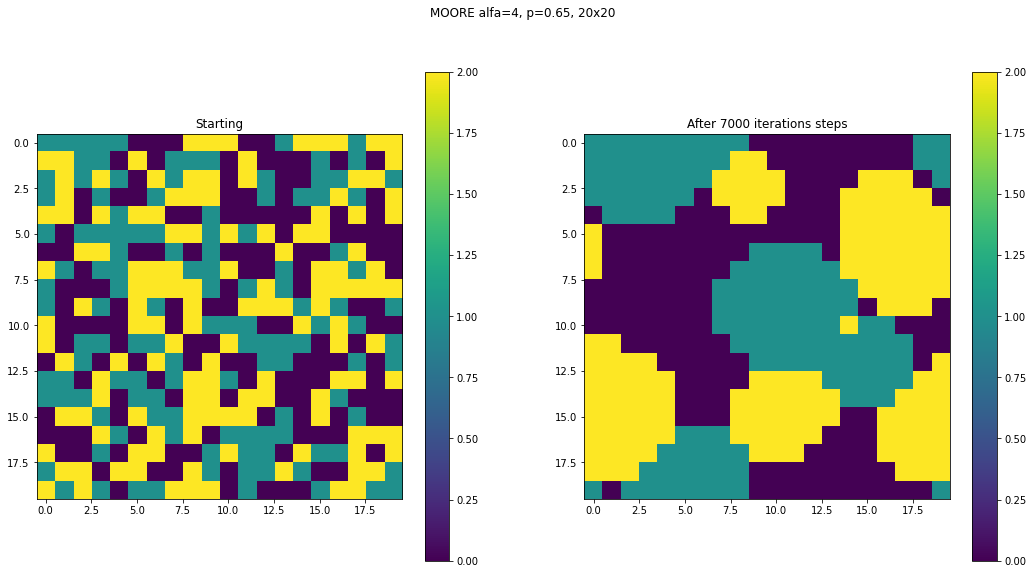

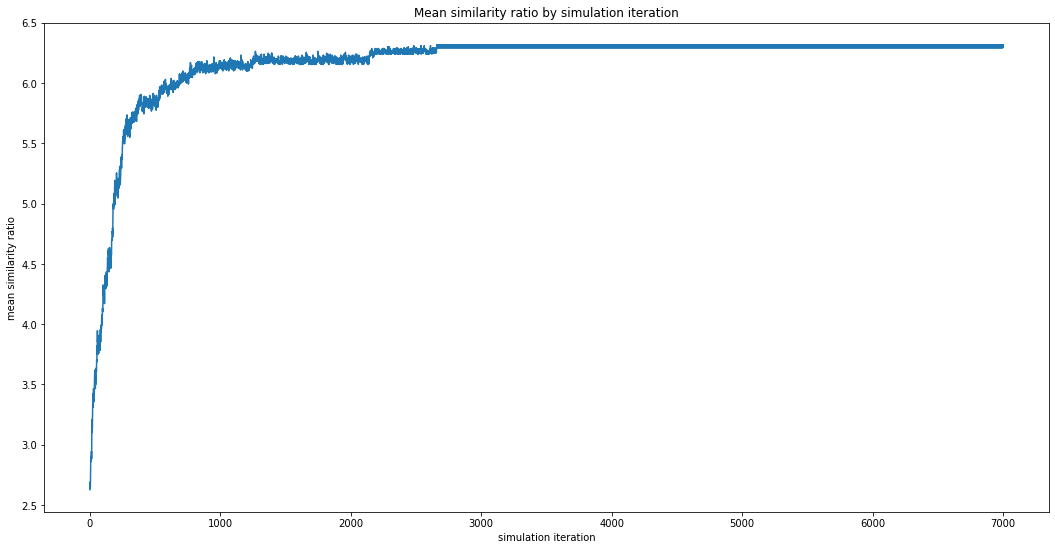

In [58]:
s = Schelling(size=20, p=.65, alfa=4, types_count=2)
s.run(7000)
s.plot()

Model ma dobrą segregacją już po 700 iteracjach. Patrząc na wcześniejsze wykresy, można powiedzieć że im większe p tym segregacja szybciej będzie zbiegała

100%|█████████████████████████████████████████| 7000/7000 [01:38<00:00, 71.07it/s]


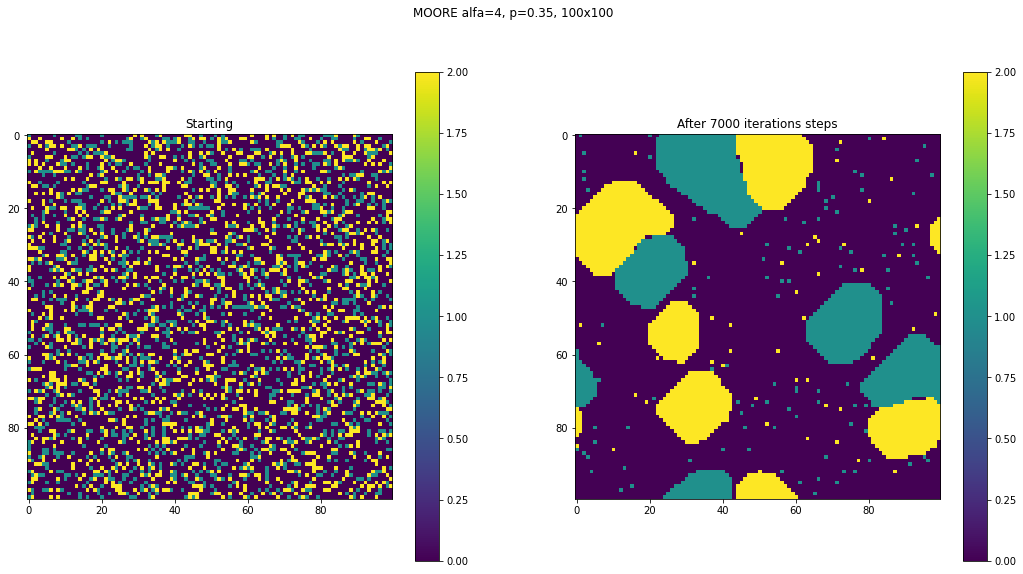

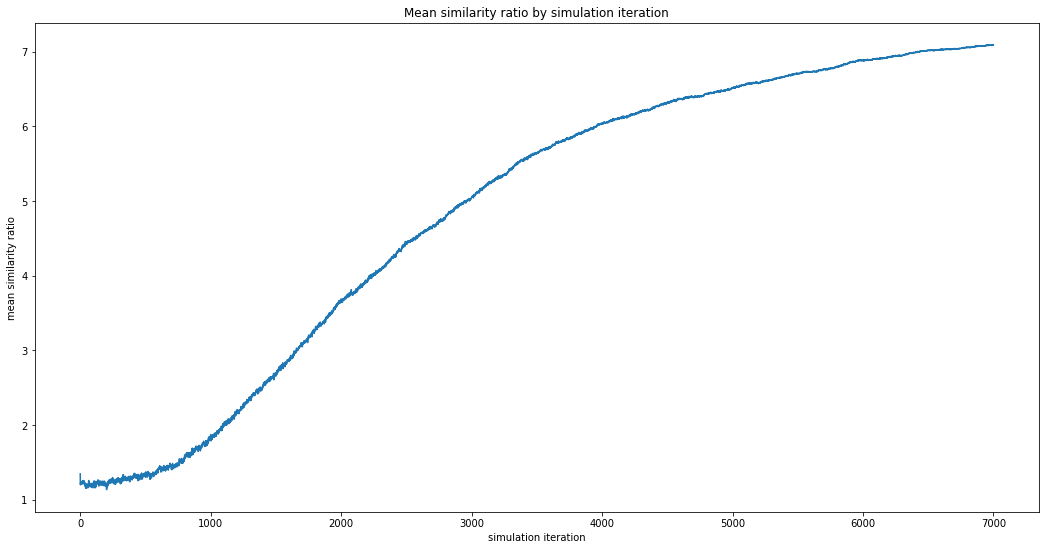

In [59]:
s = Schelling(size=100, p=.35, alfa=4, types_count=2)
s.run(7000)
s.plot()

Model przy 7000 iteracjach miał już dobrą segregacje.

100%|█████████████████████████████████████████| 7000/7000 [01:32<00:00, 75.39it/s]


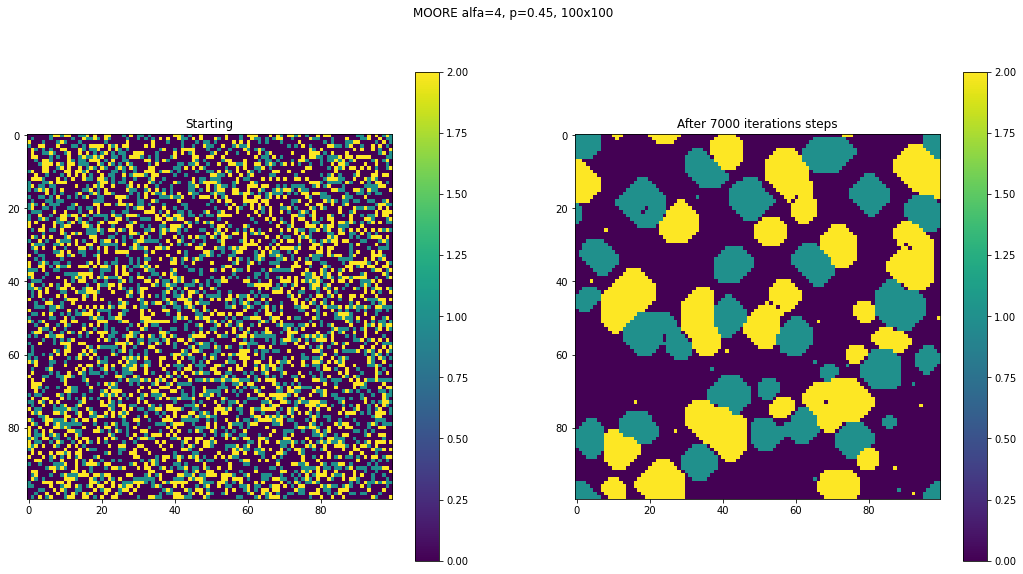

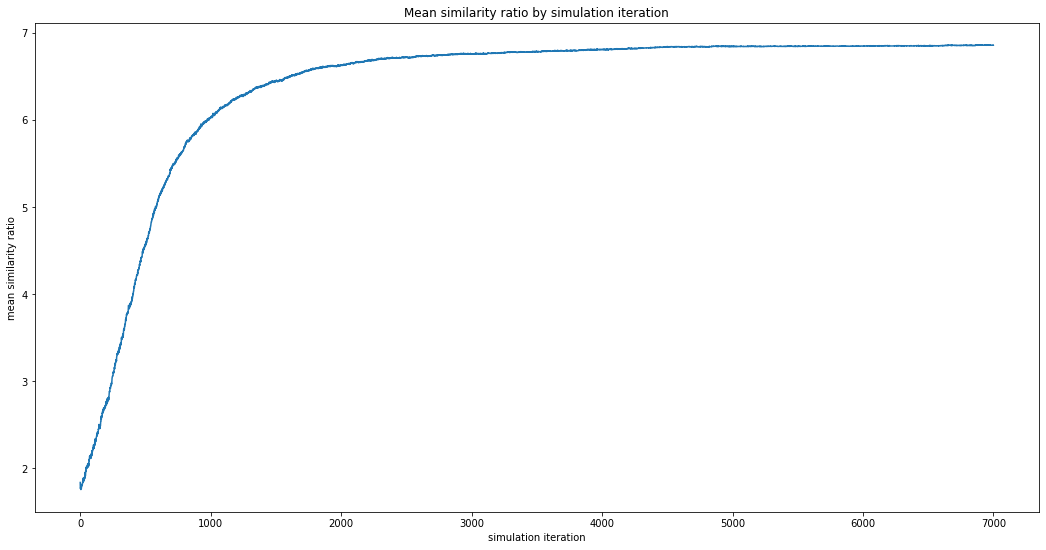

In [60]:
s = Schelling(size=100, p=.45, alfa=4, types_count=2)
s.run(7000)
s.plot()

Model przy 2000 iteracjach miał już dobrą segregacje.

100%|█████████████████████████████████████████| 7000/7000 [01:46<00:00, 66.04it/s]


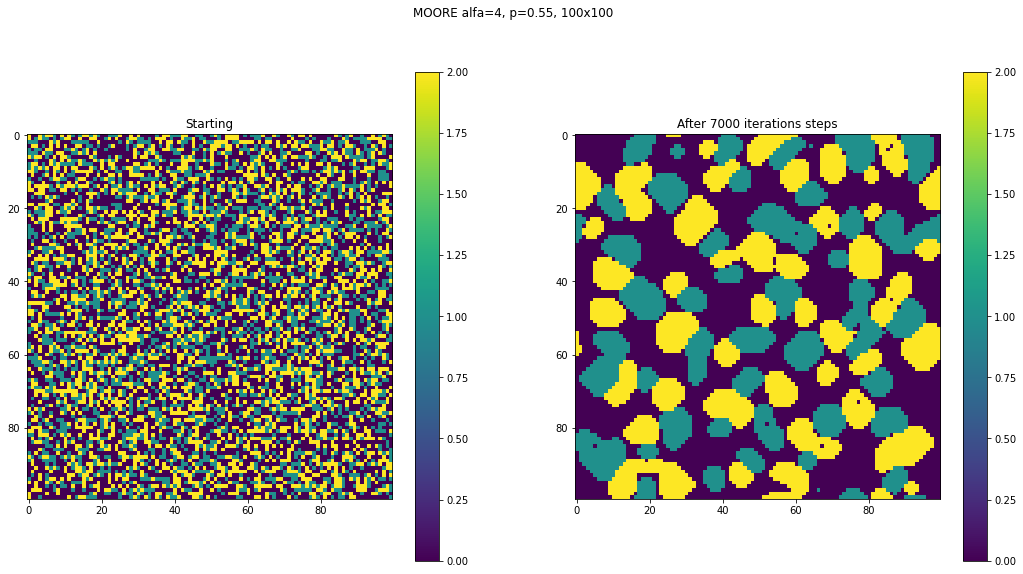

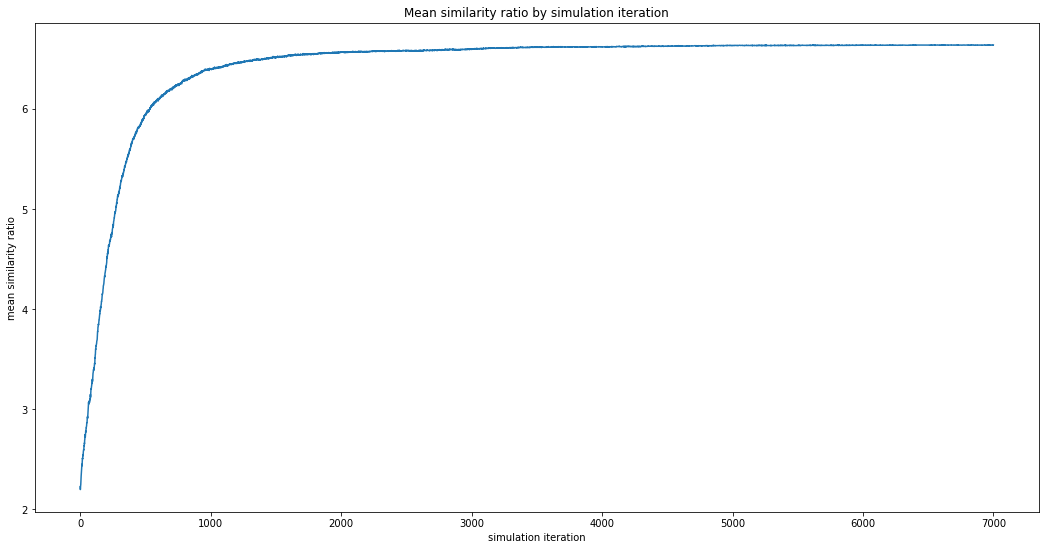

In [61]:
s = Schelling(size=100, p=.55, alfa=4, types_count=2)
s.run(7000)
s.plot()

Model przy 1000 iteracjach miał już dobrą segregacje.

100%|█████████████████████████████████████████| 7000/7000 [01:56<00:00, 59.84it/s]


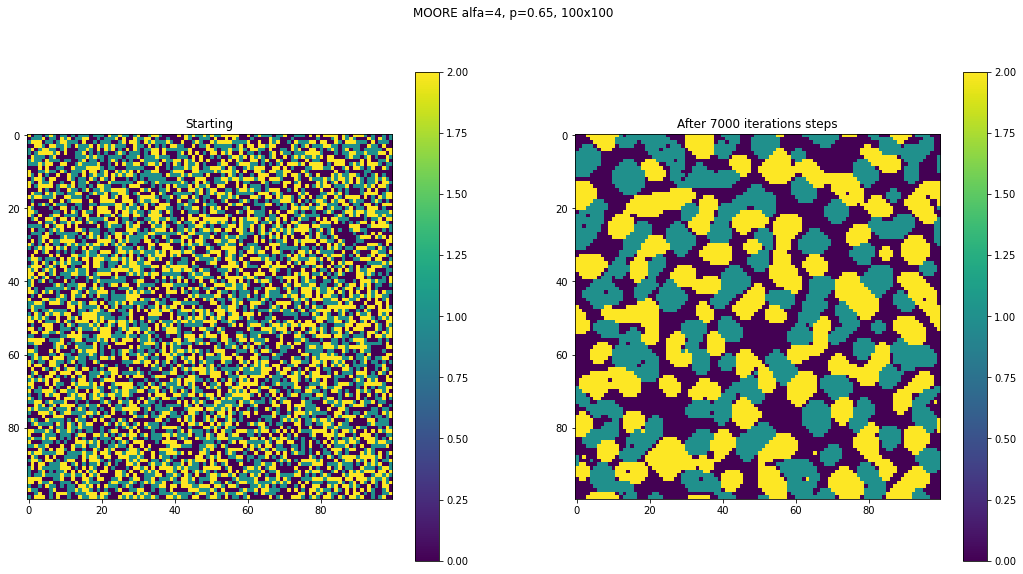

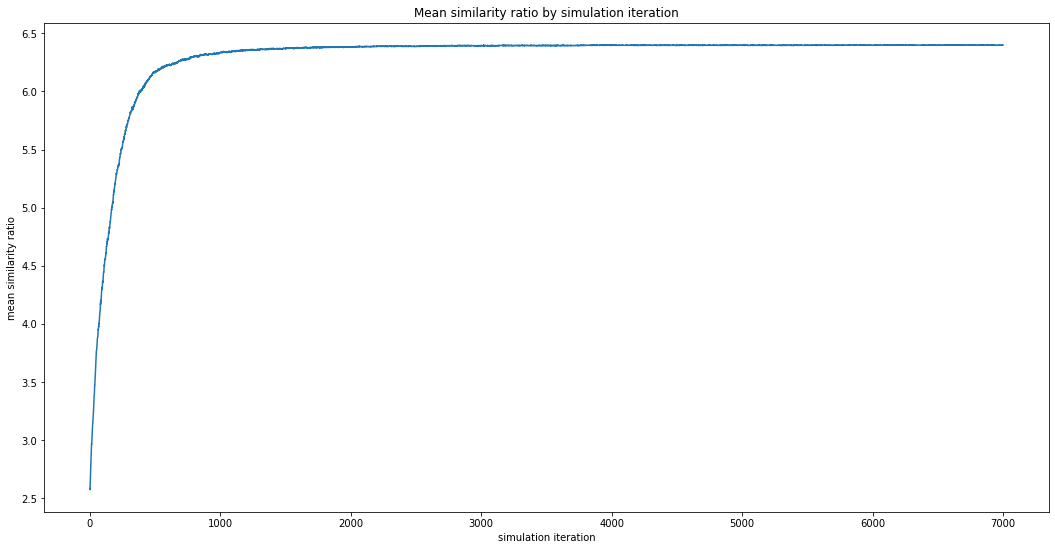

In [93]:
s = Schelling(size=100, p=.65, alfa=4, types_count=2)
s.run(7000)
s.plot()

Model przy 700 iterachach miał już dobrą segregację.

100%|█████████████████████████████████████████| 7000/7000 [03:41<00:00, 31.62it/s]


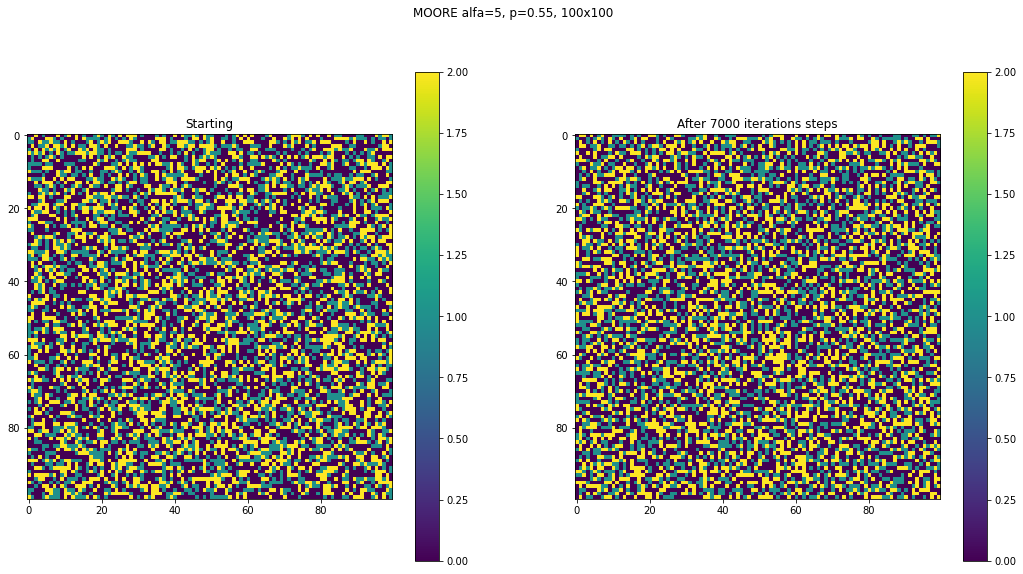

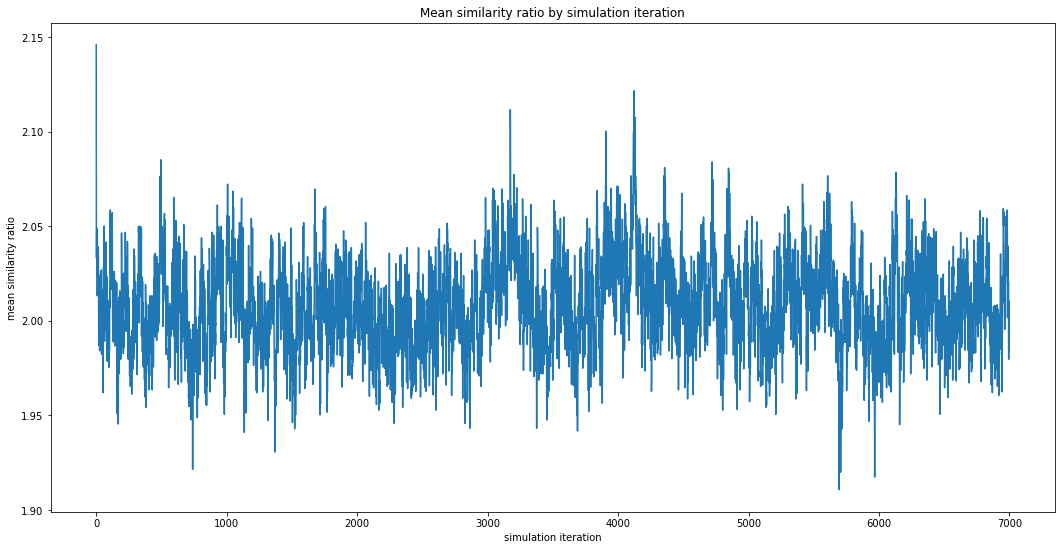

In [63]:
s = Schelling(size=100, p=.55, alfa=5, types_count=2)
s.run(7000)
s.plot()

Przy alfa=5 nie udało się uzyskać sensownych wyników

## 2. Liczba typów agentów: 4

100%|███████████████████████████████████████| 7000/7000 [00:06<00:00, 1166.42it/s]


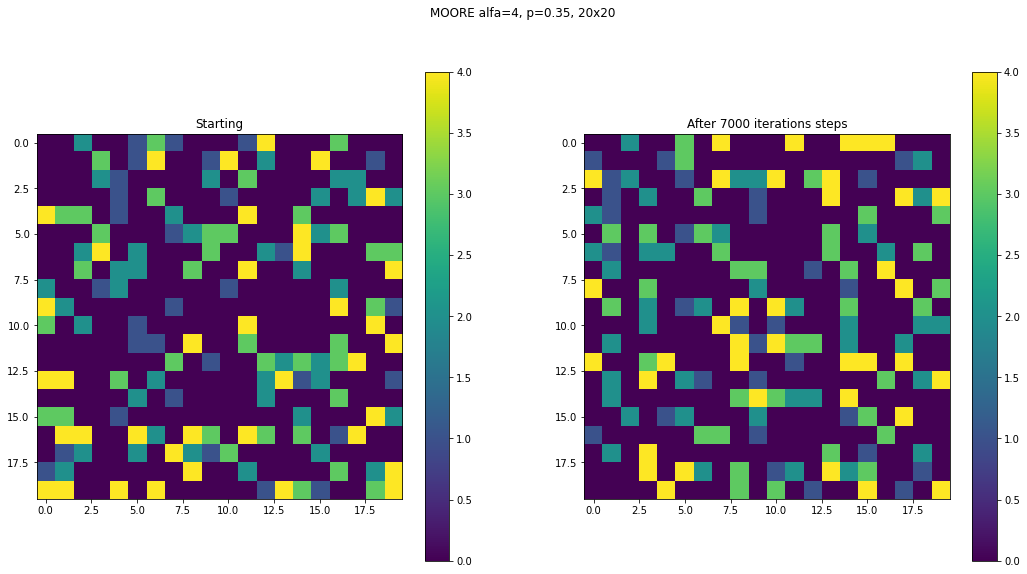

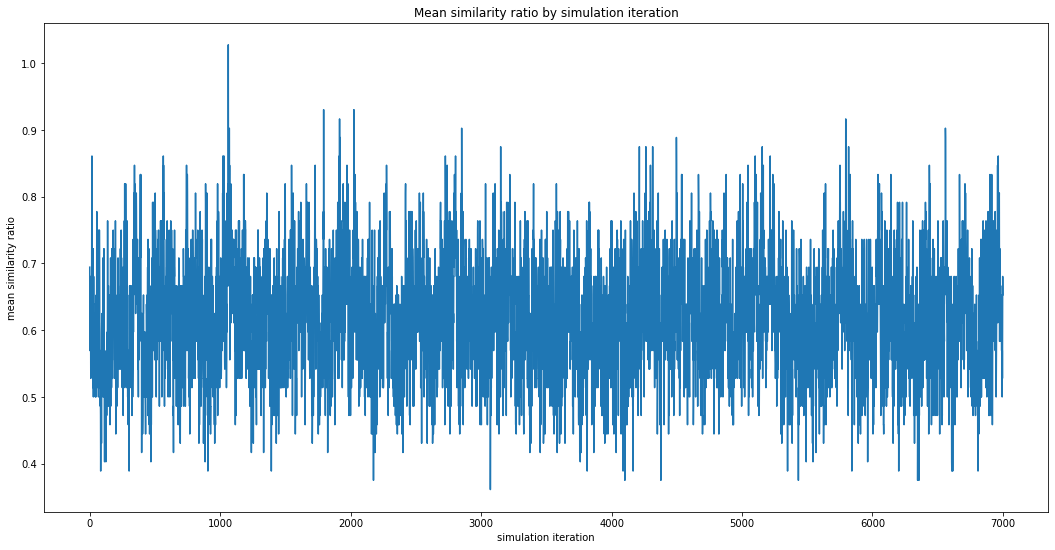

In [66]:
s = Schelling(size=20, p=.35, alfa=4, types_count=4)
s.run(7000)
s.plot()

nie udało się uzyskać segregacji

100%|███████████████████████████████████████| 7000/7000 [00:06<00:00, 1006.09it/s]


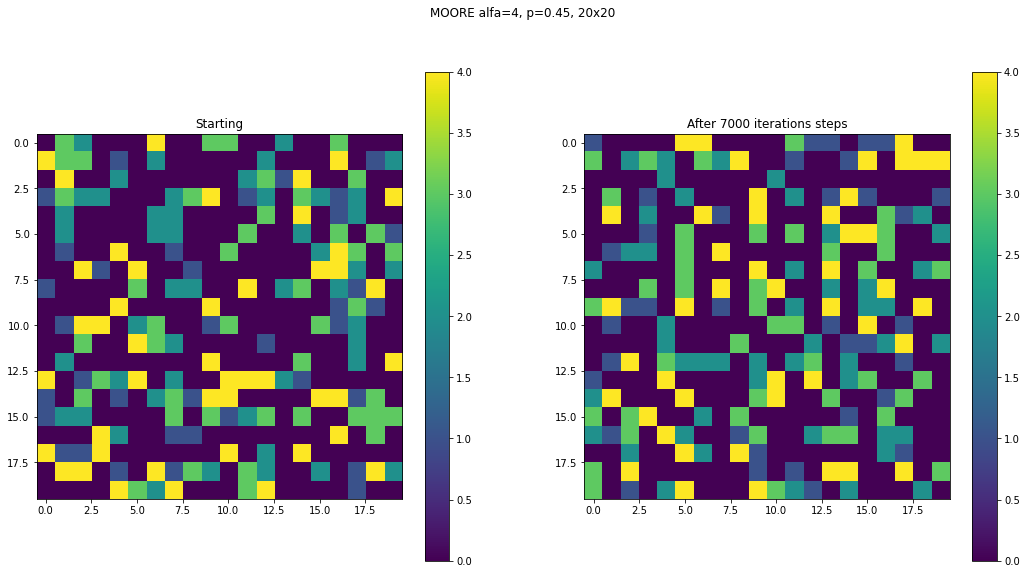

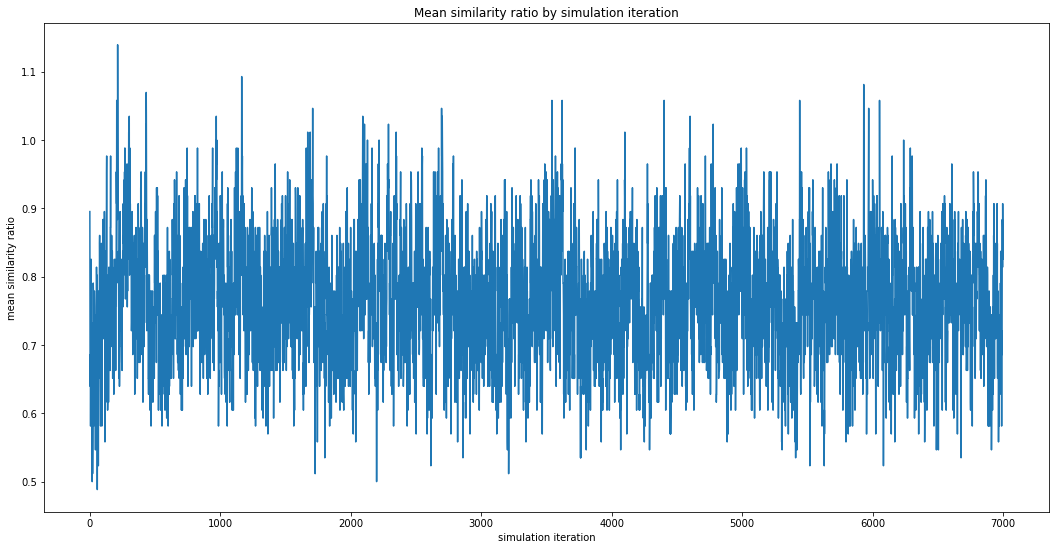

In [67]:
s = Schelling(size=20, p=.45, alfa=4, types_count=4)
s.run(7000)
s.plot()

nie udało się uzyskać segregacji

100%|████████████████████████████████████████| 7000/7000 [00:08<00:00, 834.01it/s]


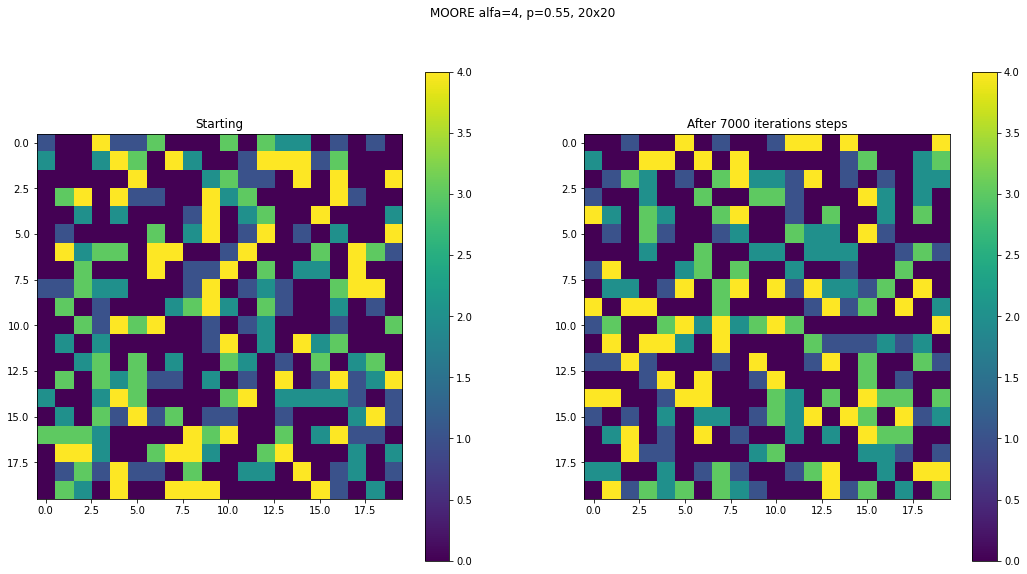

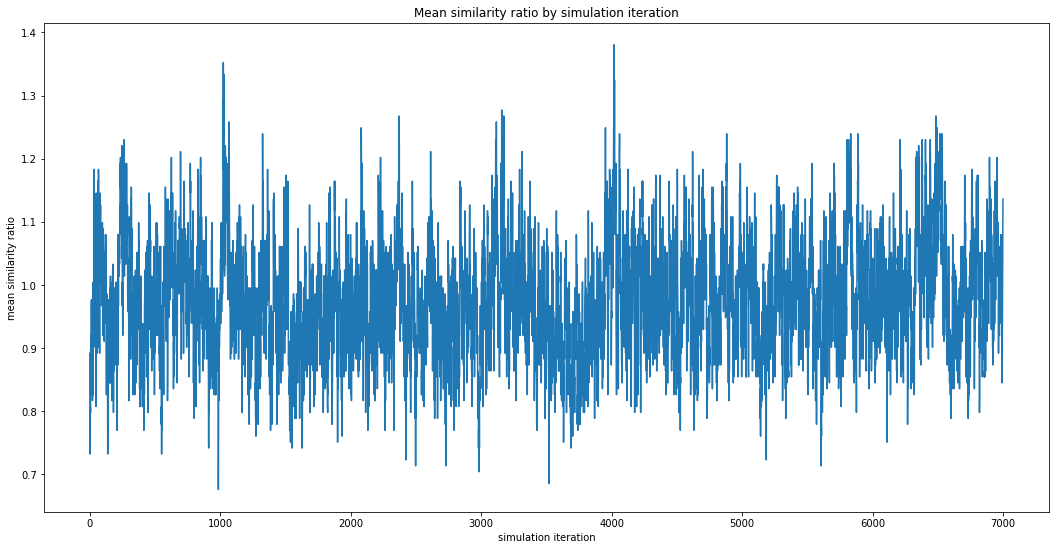

In [68]:
s = Schelling(size=20, p=.55, alfa=4, types_count=4)
s.run(7000)
s.plot()

nie udało się uzyskać segregacji

100%|████████████████████████████████████████| 7000/7000 [00:09<00:00, 749.94it/s]


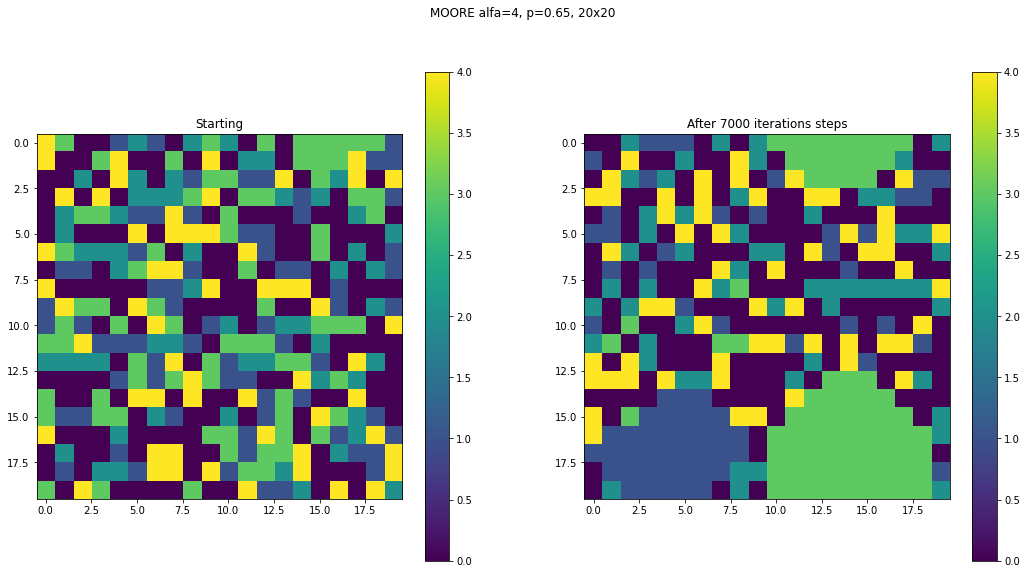

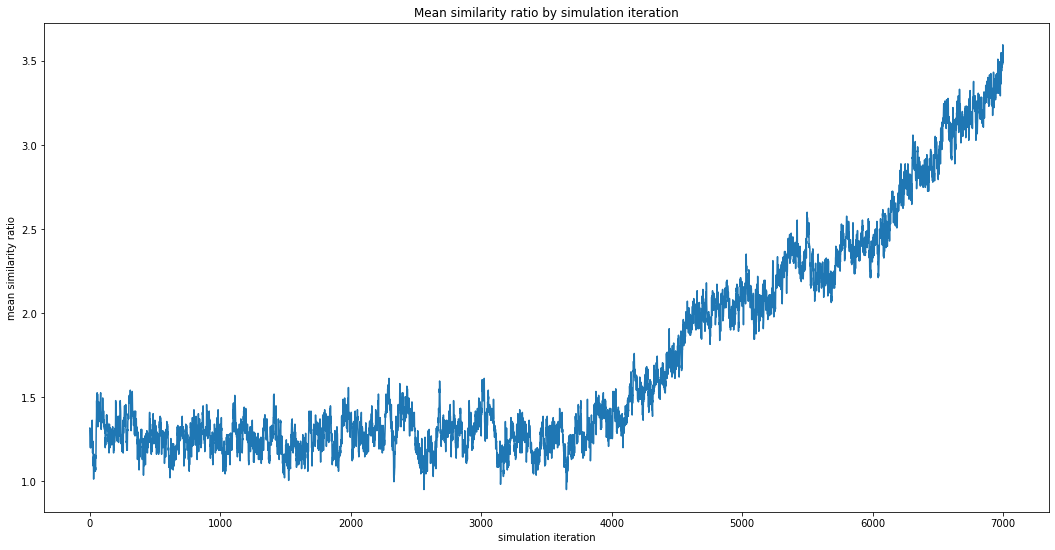

In [69]:
s = Schelling(size=20, p=.65, alfa=4, types_count=4)
s.run(7000)
s.plot()

Segregacja zaczeła się tworzyć przy 5000 iteracji

100%|█████████████████████████████████████████| 7000/7000 [02:32<00:00, 45.88it/s]


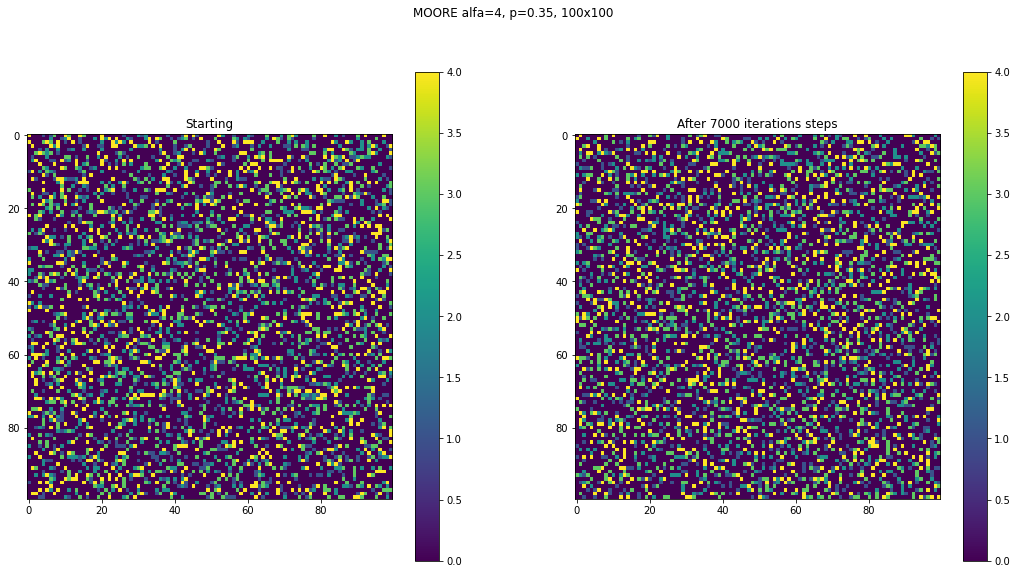

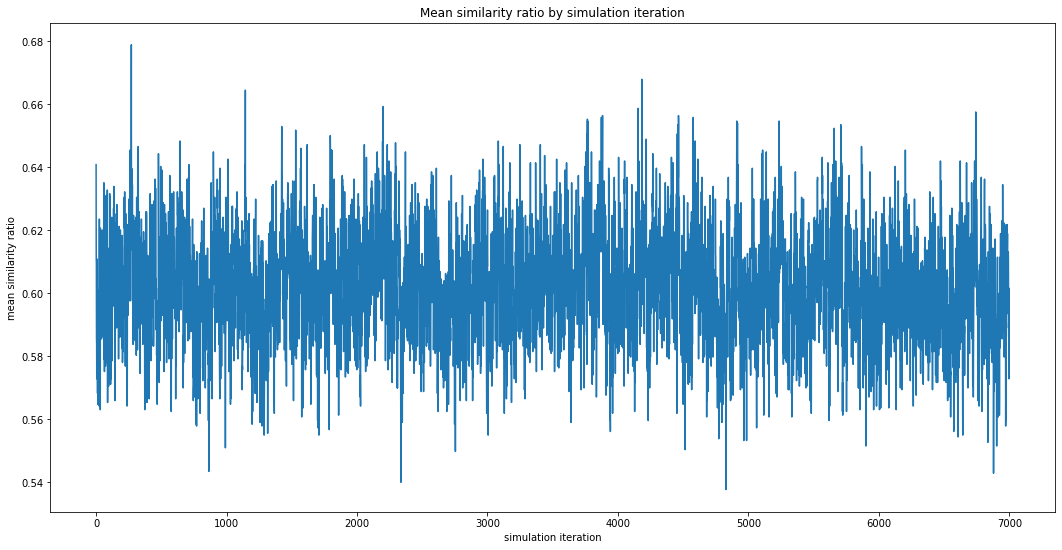

In [70]:
s = Schelling(size=100, p=.35, alfa=4, types_count=4)
s.run(7000)
s.plot()

nie udało się uzyskać segregacji

100%|█████████████████████████████████████████| 7000/7000 [03:18<00:00, 35.29it/s]


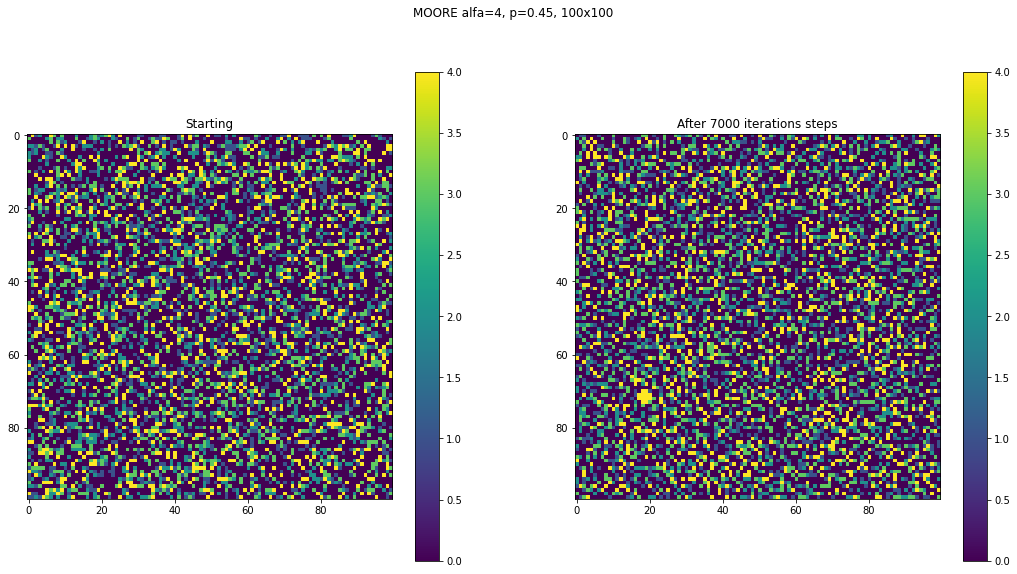

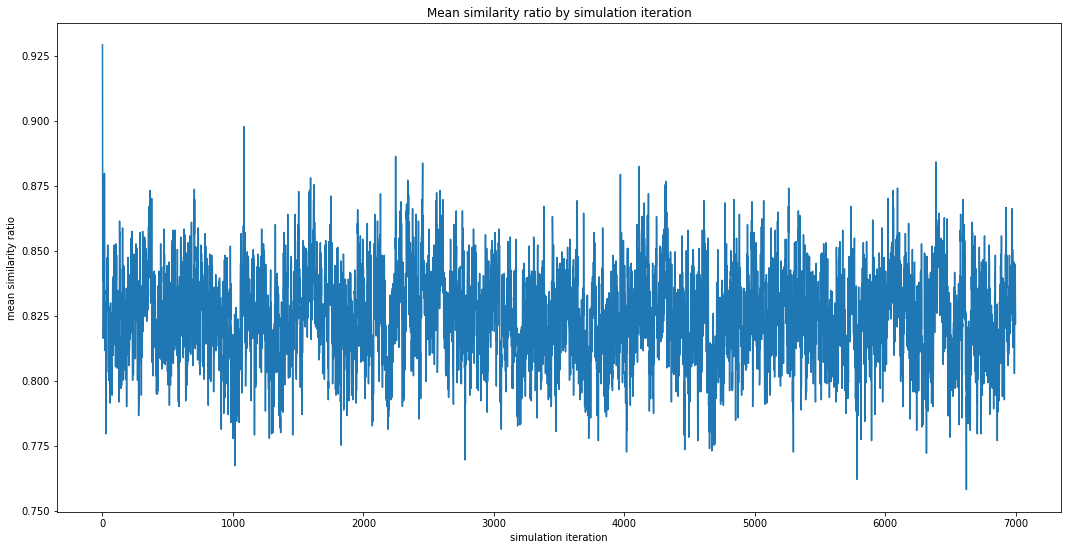

In [71]:
s = Schelling(size=100, p=.45, alfa=4, types_count=4)
s.run(7000)
s.plot()

nie udało się uzyskać segregacji

100%|█████████████████████████████████████████| 7000/7000 [03:21<00:00, 34.77it/s]


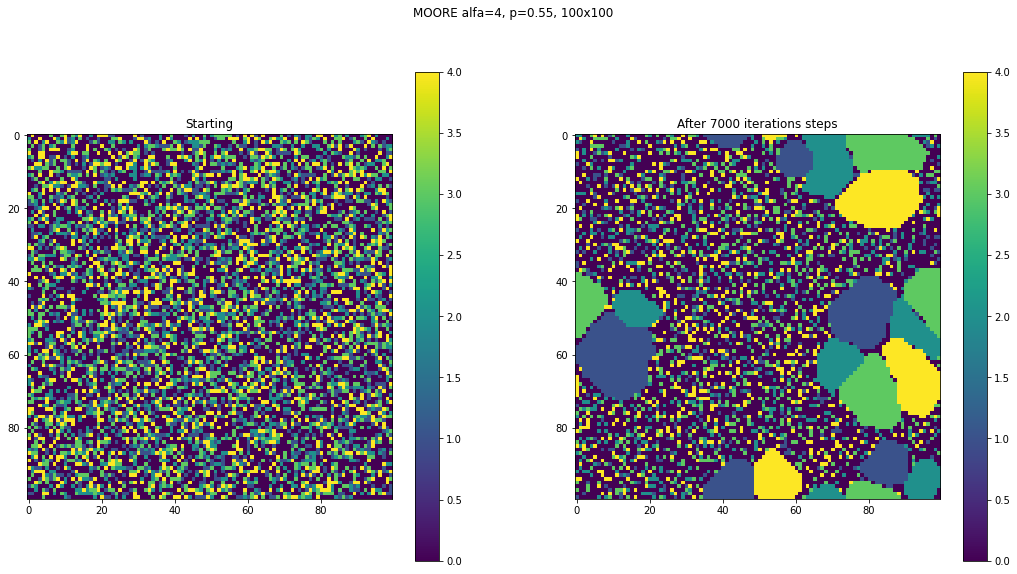

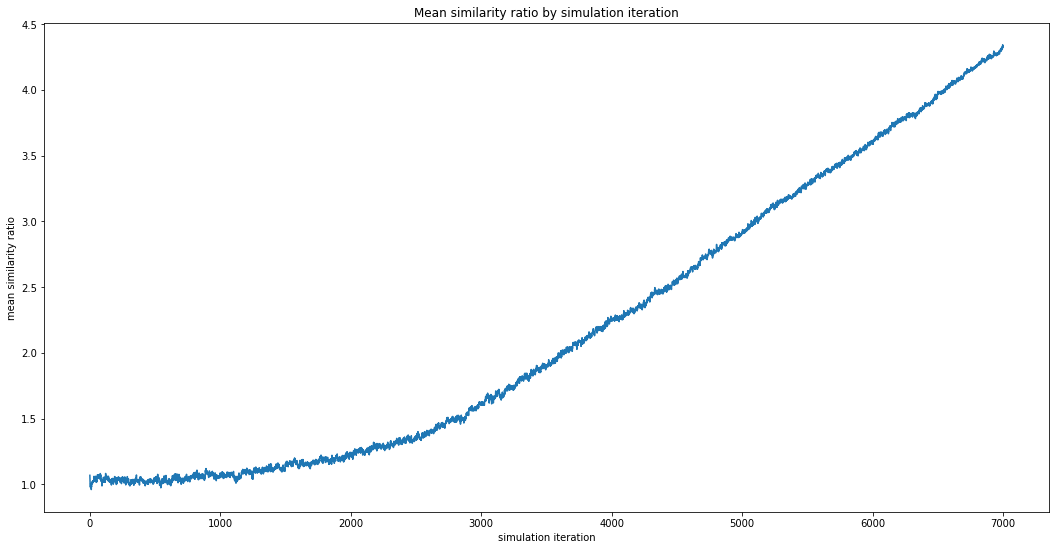

In [72]:
s = Schelling(size=100, p=.55, alfa=4, types_count=4)
s.run(7000)
s.plot()

Powoli zaczeła się segregacja. Potrzeba by była większa ilość iteracji, aby zobaczyć lepszy wynik

100%|█████████████████████████████████████████| 7000/7000 [03:09<00:00, 37.03it/s]


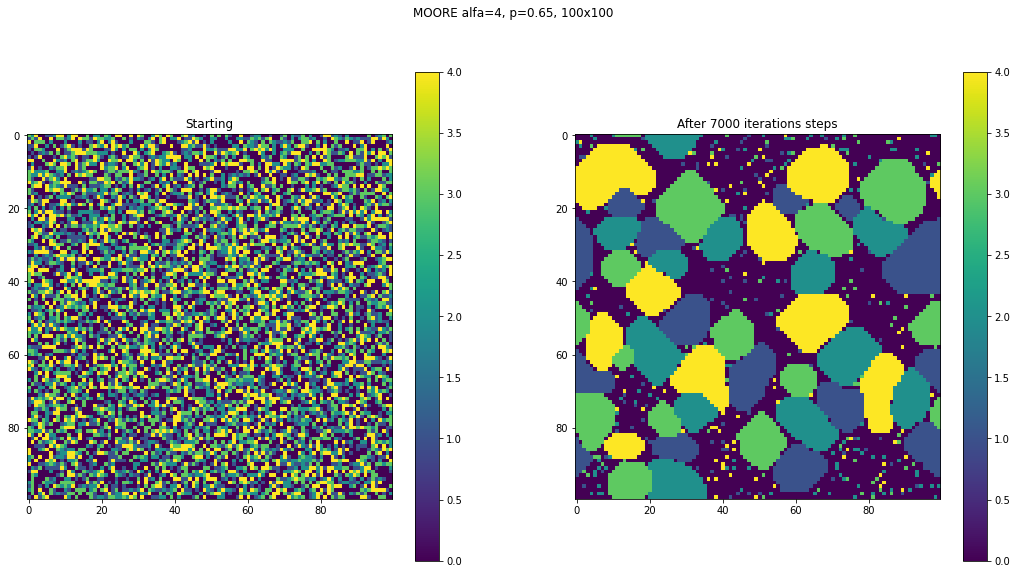

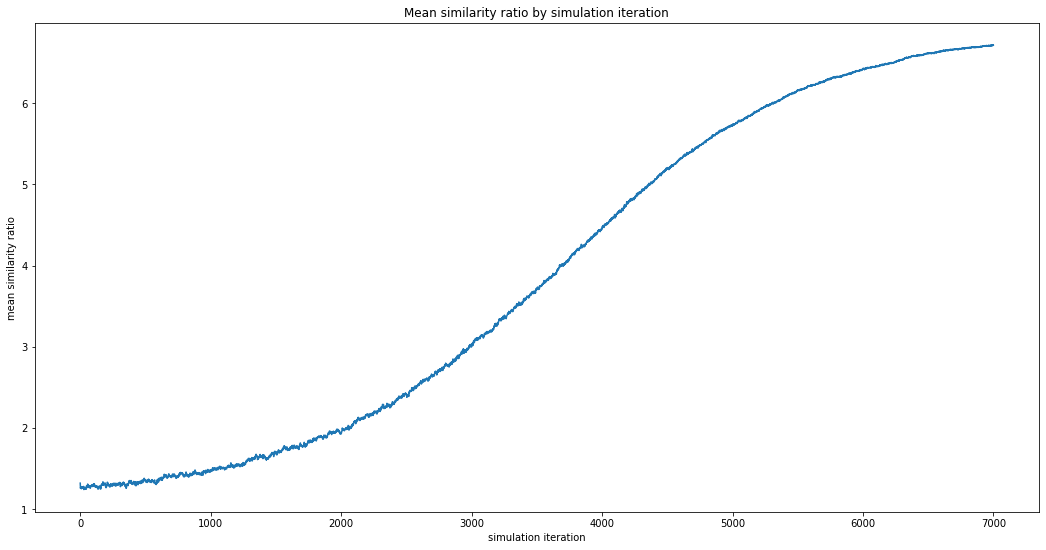

In [73]:
s = Schelling(size=100, p=.65, alfa=4, types_count=4)
s.run(7000)
s.plot()

Tu najlepiej wyszła segregacja dla 4 typów agentów. Widać dobre wyniki przy 7000 iteracjach.

100%|█████████████████████████████████████████| 7000/7000 [03:47<00:00, 30.75it/s]


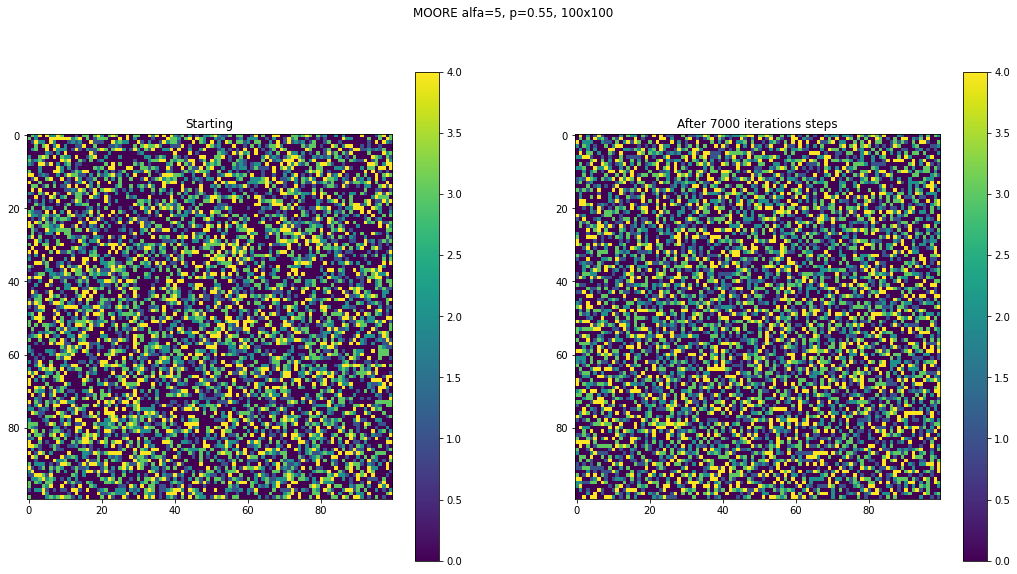

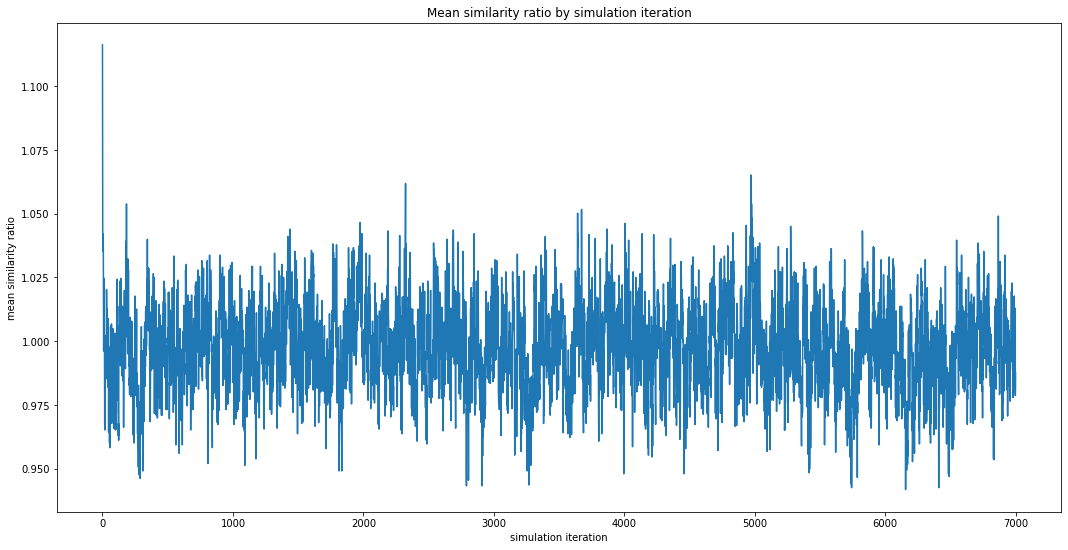

In [74]:
s = Schelling(size=100, p=.55, alfa=5, types_count=4)
s.run(7000)
s.plot()

# Zadanie 2* Model Gaylorda - D’Andria

In [51]:
from collections import Counter
from random import shuffle

class Gaylord():
    def __init__(self, size, p, alfa=4, types_count=2):
        self.size = size
        self.MOORE_OFFSETS = [(1, 1), (1, -1), (1, 0), (-1, 0), (-1, 1), (-1, -1), (0, 1), (0, -1)]
        self.alfa = alfa
        self.p = p
        self.types_count = types_count
        
        empty_ration = 1 - p
        
        probabilities = [p / types_count for _ in range(types_count)]
        probabilities = [empty_ration] + probabilities
        choices = [0] + [type_a for type_a in range(1, types_count + 1)]
        self.mat = np.random.choice(choices, size=(size, size), p=probabilities)
        self.starting_mat = copy.deepcopy(self.mat)
        self.average_si = []
        
    def run(self, iterations_count):
        self.iterations_count = iterations_count
        for i in tqdm.tqdm(range(iterations_count)):
            self.step()
                
    def step(self):
        next_places = defaultdict(list)
        self.sis = []
        self.agents_that_want_to_move = []
        self.places_agents_want_to_move_to = []
        for i in range(self.types_count):
            self.agents_that_want_to_move.append(set())
            self.places_agents_want_to_move_to.append([])
            
        for (row, col), value in np.ndenumerate(self.mat):
            if value != 0:
                type_a = self.mat[row, col]
                places = [((row+dr) % self.size, (col+dc) % self.size) for (dr, dc) in self.MOORE_OFFSETS]
                len_places = len([place for place in places if self.mat[place] == type_a])
                self.sis.append(len_places)
                if len_places < self.alfa:
                    self.agents_that_want_to_move[type_a - 1].add((row, col))
            elif value == 0:
                places = [((row+dr) % self.size, (col+dc) % self.size) for (dr, dc) in self.MOORE_OFFSETS]
                places = Counter([self.mat[place] for place in places if self.mat[place]])
                for i in range(1, self.types_count + 1):
                    if places[i] >= self.alfa:
                        self.places_agents_want_to_move_to[i - 1].append((row, col))
                
      
        shared_elements = set(self.places_agents_want_to_move_to[0]).intersection(*self.places_agents_want_to_move_to)
        self.places_agents_want_to_move_to = [set(place) - shared_elements for place in self.places_agents_want_to_move_to]
        
        for i in range(self.types_count):
            min_length = min(len(self.agents_that_want_to_move[i]), len(self.places_agents_want_to_move_to[i]))
            
            self.agents_that_want_to_move[i] = list(self.agents_that_want_to_move[i])
            shuffle(self.agents_that_want_to_move[i])
            self.agents_that_want_to_move[i] = self.agents_that_want_to_move[i][:min_length]
            
            self.places_agents_want_to_move_to[i] = list(self.places_agents_want_to_move_to[i])
            shuffle(self.places_agents_want_to_move_to[i])
            self.places_agents_want_to_move_to[i] = self.places_agents_want_to_move_to[i][:min_length]

        self.average_si.append(np.mean(self.sis))
        
        for places_agents_want_to_move_to, agents_that_want_to_move in zip(self.places_agents_want_to_move_to, self.agents_that_want_to_move):
            for (new_row, new_col), (row, col) in zip(places_agents_want_to_move_to, agents_that_want_to_move):
                self.mat[new_row, new_col], self.mat[row, col] = self.mat[row, col], self.mat[new_row, new_col]
                
    
    def calculate_neighberhood_count(self, row, col):
        places = [((row+dr) % self.size, (col+dc) % self.size) for (dr, dc) in self.MOORE_OFFSETS]
        places = len([self.mat[place] for place in places])
        self.sis.append(len_places)
        if len_places < self.alfa:
            places = [((row+dr) % self.size, (col+dc) % self.size) for (dr, dc) in self.MOORE_OFFSETS]
            return [place for place in places if self.mat[place] == 0]
    
    def plot(self, figsize=(18, 9)):
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = figsize) 
        fig.suptitle(f'MOORE alfa={self.alfa}, p={self.p}, {self.size}x{self.size}')
        img1 = ax1.imshow(self.starting_mat, interpolation="nearest", vmin = 0,vmax = self.types_count)
        ax1.set_title("Starting")
        img2 = ax2.imshow(self.mat, interpolation="nearest", vmin = 0,vmax = self.types_count)
        ax2.set_title(f"After {self.iterations_count} iterations steps")
        plt.colorbar(img1, ax=ax1)
        plt.colorbar(img2, ax=ax2)
        plt.show()
        plt.figure(figsize=figsize)
        plt.title('Mean similarity ratio by simulation iteration')
        plt.xlabel('simulation iteration')
        plt.ylabel('mean similarity ratio')
        plt.plot([i for i in range(self.iterations_count)], self.average_si)
        plt.show()

## 1. Liczba typów agentów: 2

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 724.05it/s]


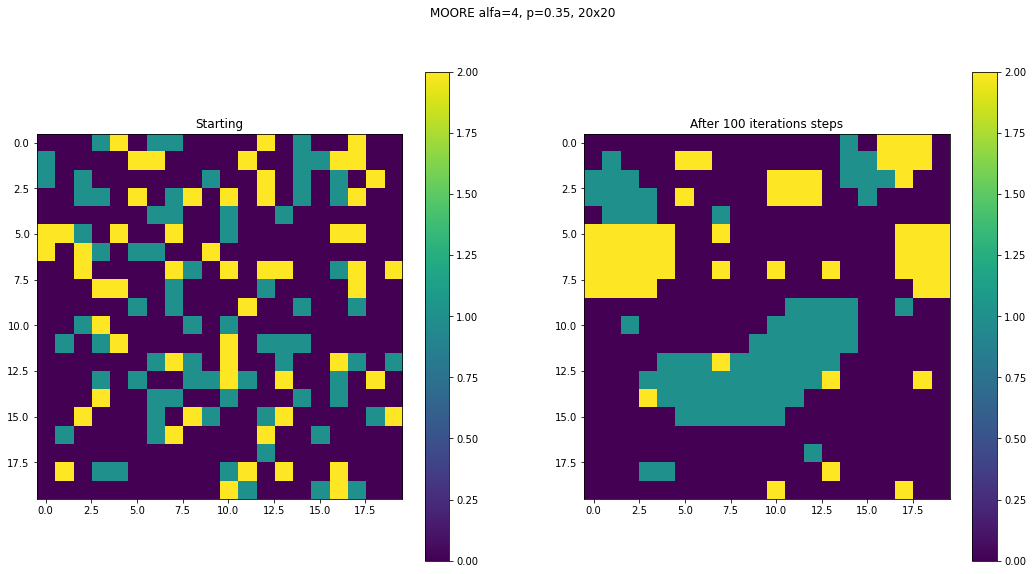

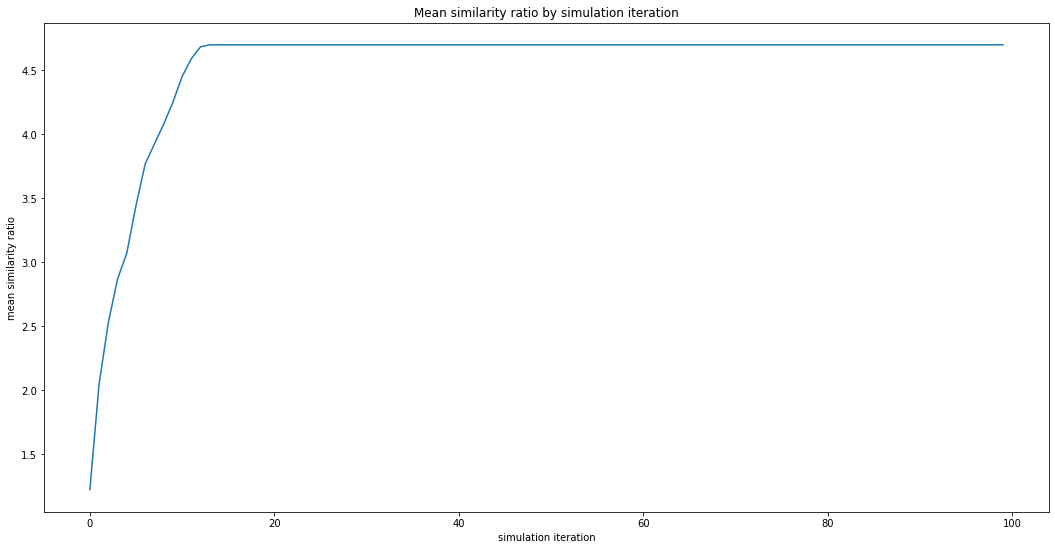

In [94]:
b = Gaylord(size=20, p=0.35, alfa=4, types_count=2)
b.run(100)
b.plot()

Model znacznie szybciej zbiega, ale osiąga gorszą segregację od poprzedniego modelu.

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 838.86it/s]


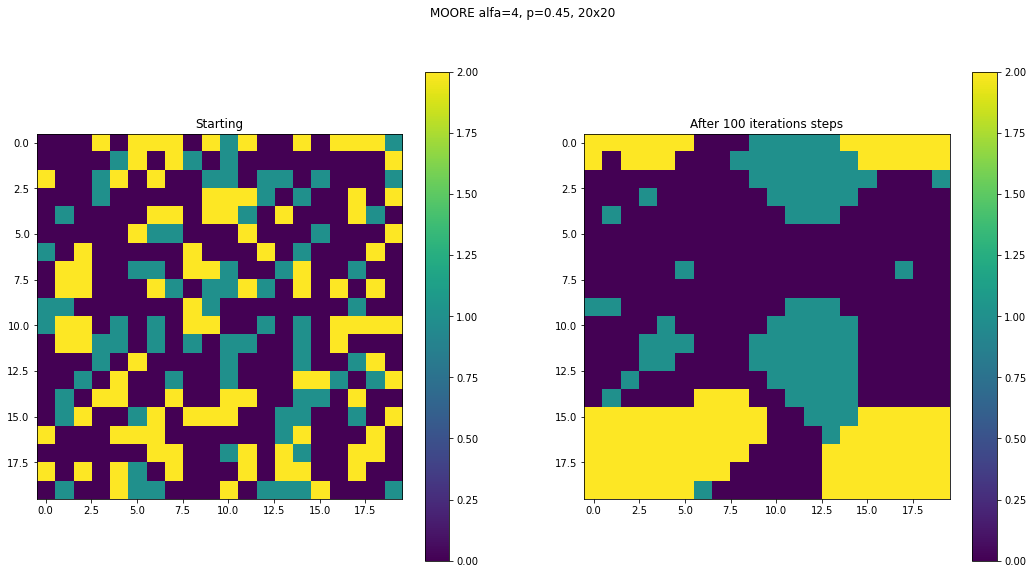

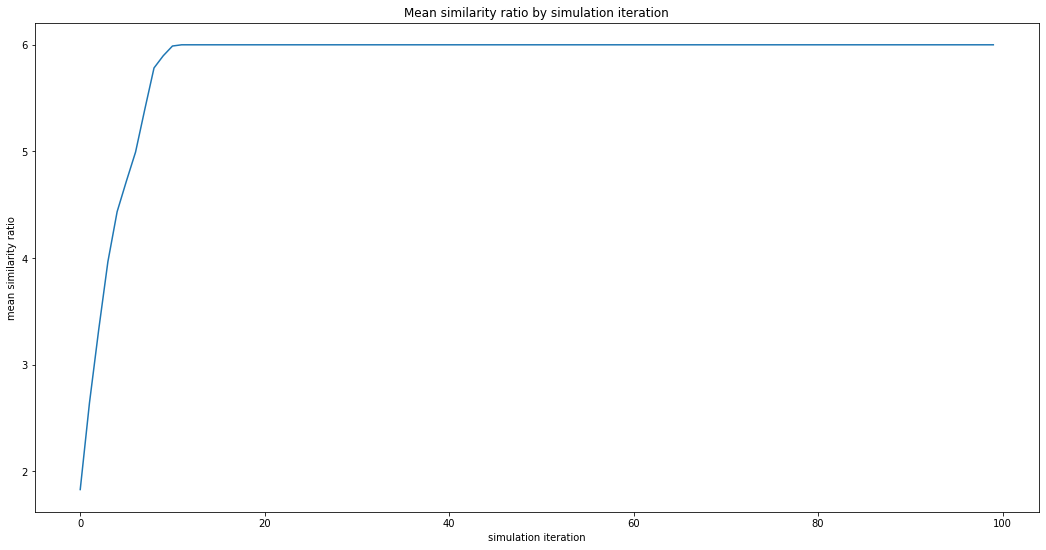

In [76]:
b = Gaylord(size=20, p=0.45, alfa=4, types_count=2)
b.run(100)
b.plot()

Model znacznie szybciej zbiega, ale osiąga gorszą segregację od poprzedniego modelu.

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 818.19it/s]


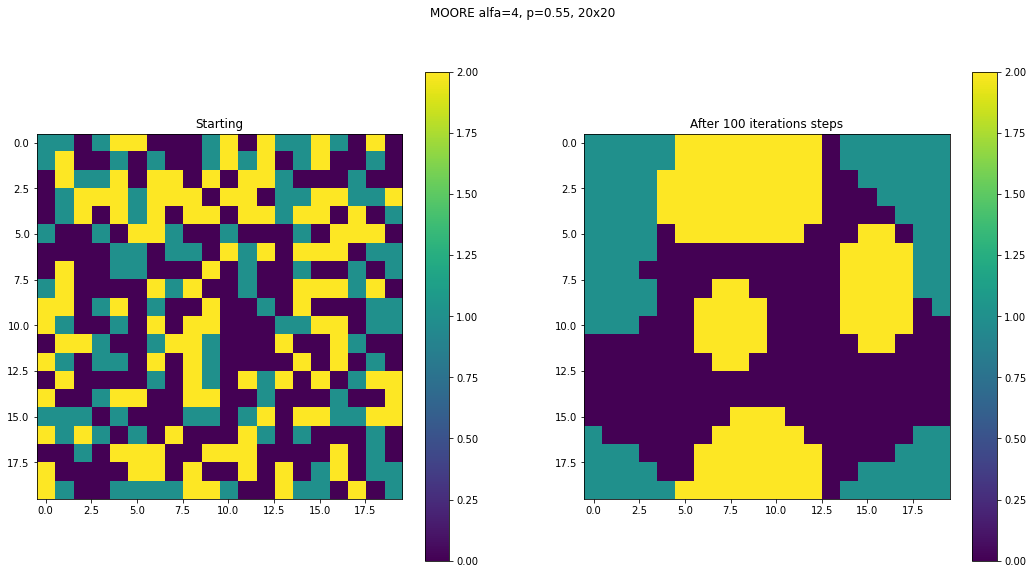

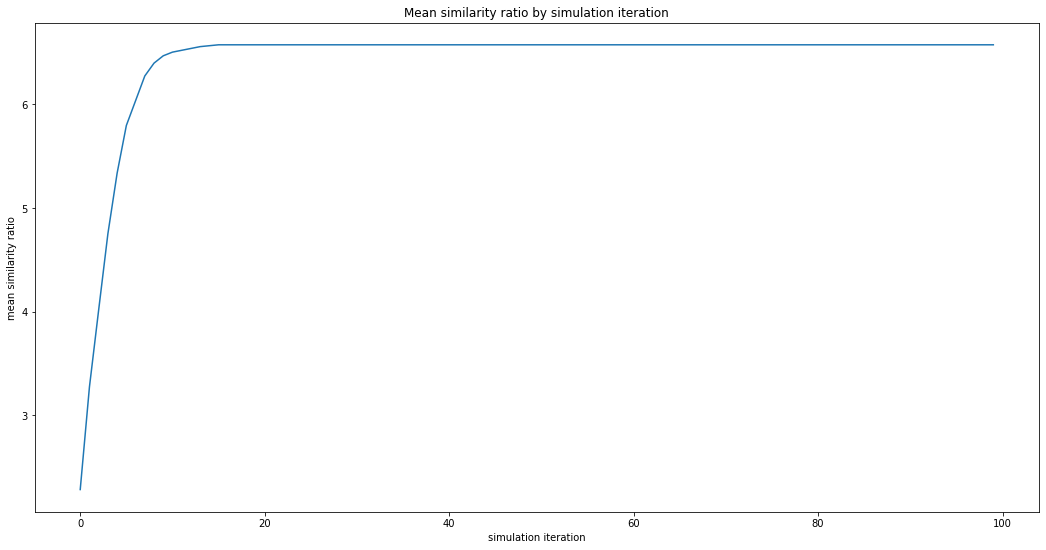

In [77]:
b = Gaylord(size=20, p=0.55, alfa=4, types_count=2)
b.run(100)
b.plot()

Model znacznie szybciej zbiega w porównaniu do poprzedniego modelu.

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 803.36it/s]


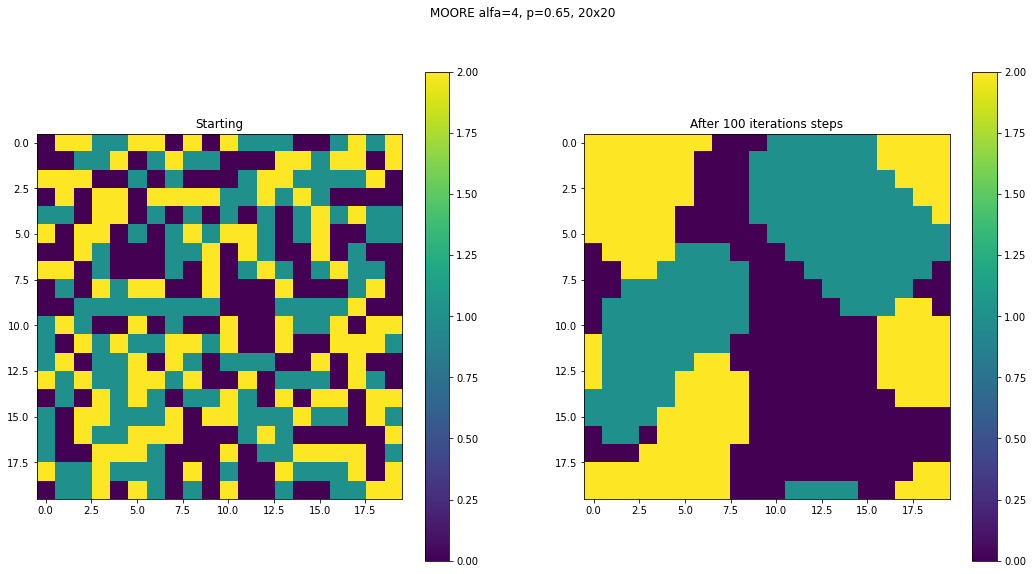

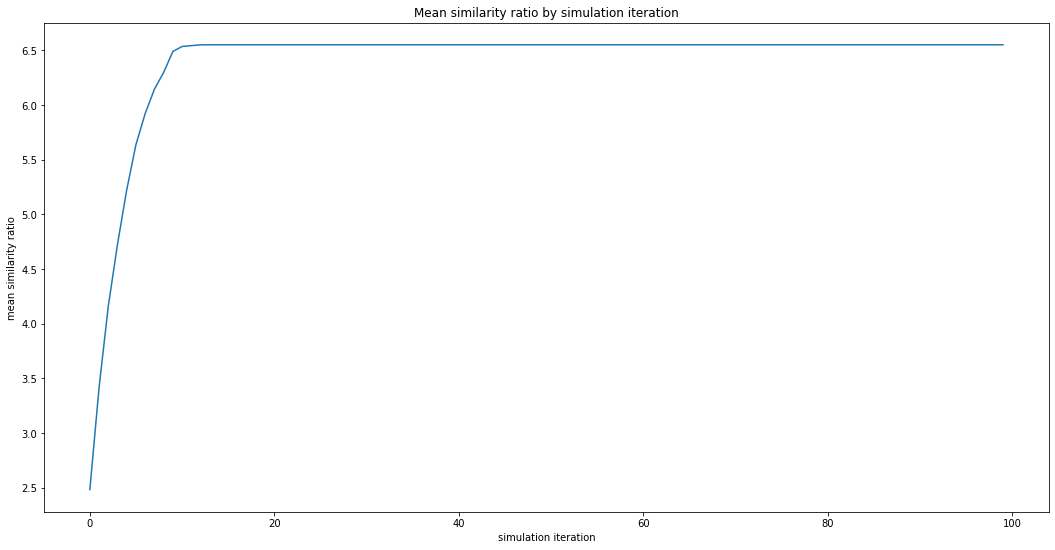

In [78]:
b = Gaylord(size=20, p=0.65, alfa=4, types_count=2)
b.run(100)
b.plot()

Model znacznie szybciej zbiega w porównaniu do poprzedniego modelu.

100%|███████████████████████████████████████████| 100/100 [00:02<00:00, 35.42it/s]


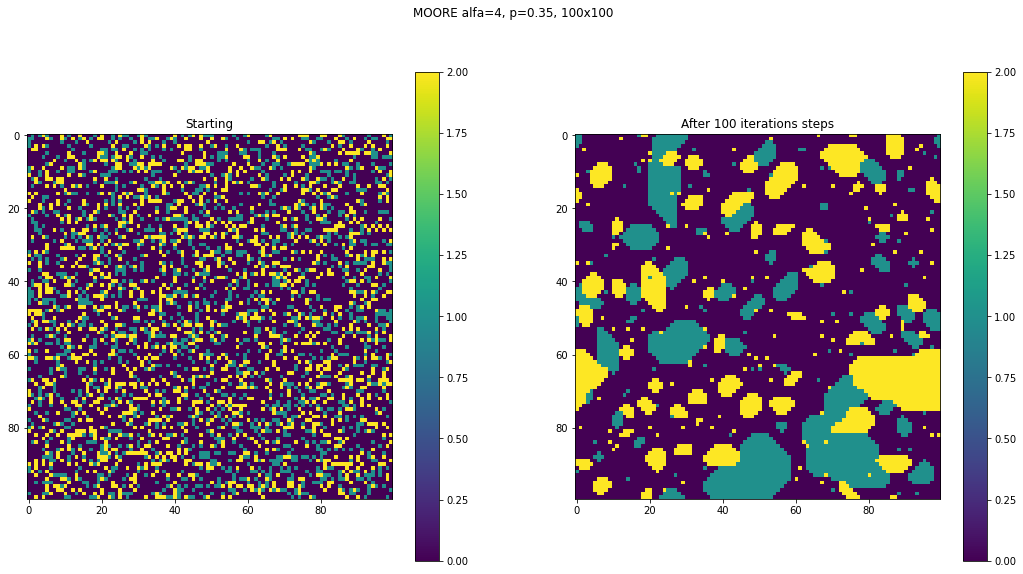

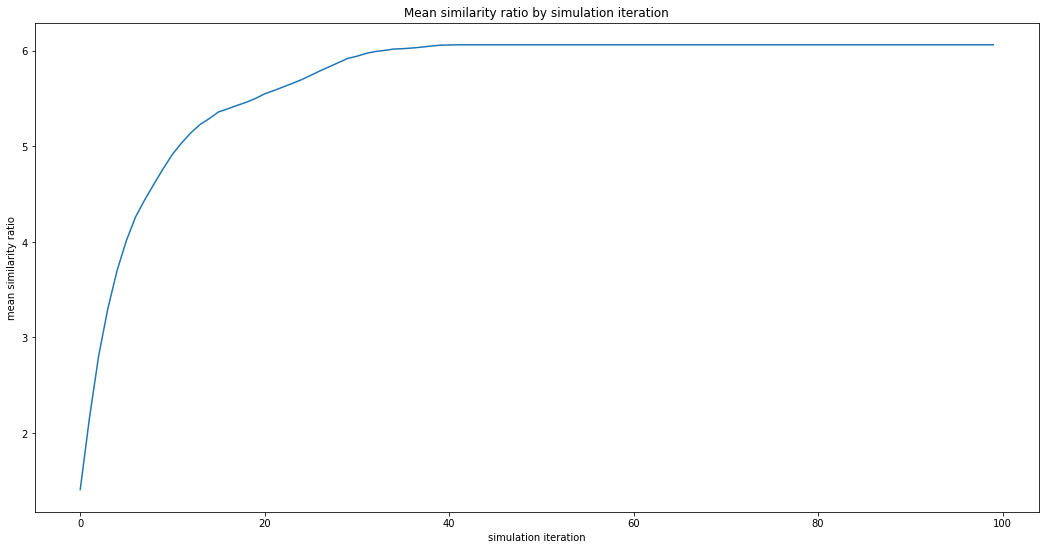

In [79]:
b = Gaylord(size=100, p=0.35, alfa=4, types_count=2)
b.run(100)
b.plot()

Model znacznie szybciej zbiega w porównaniu do poprzedniego modelu.

100%|███████████████████████████████████████████| 100/100 [00:02<00:00, 36.65it/s]


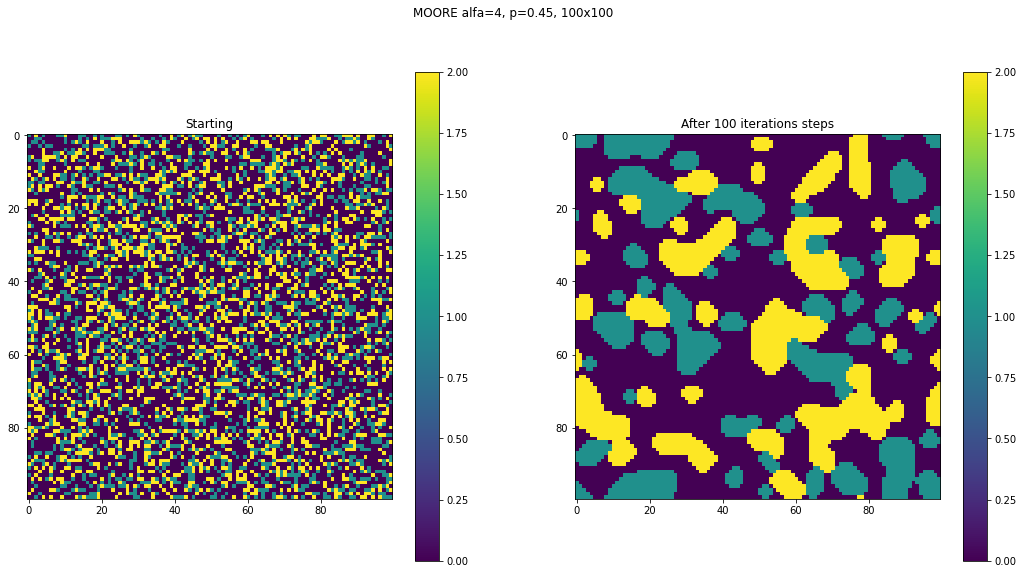

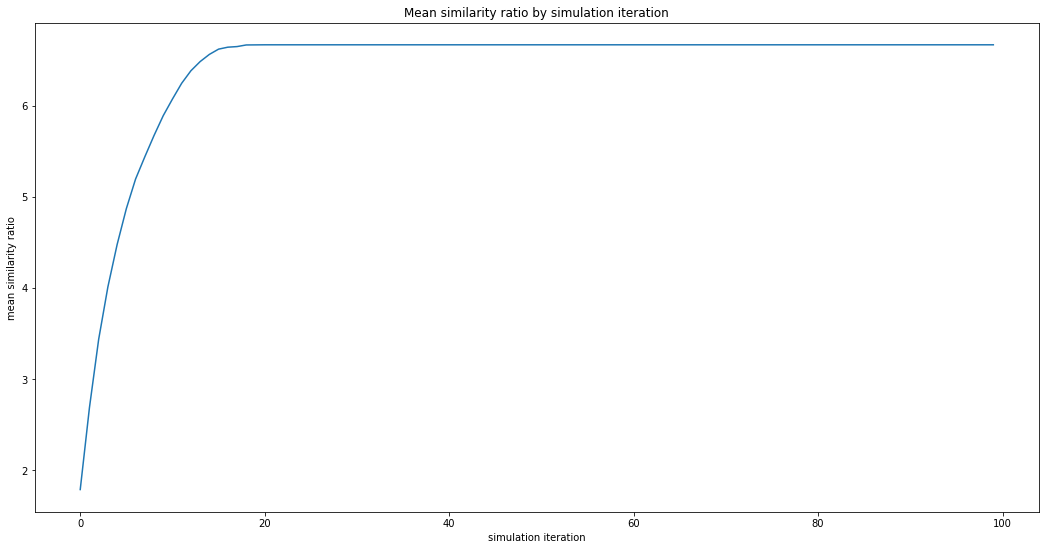

In [80]:
b = Gaylord(size=100, p=0.45, alfa=4, types_count=2)
b.run(100)
b.plot()

Model znacznie szybciej zbiega w porównaniu do poprzedniego modelu.

100%|███████████████████████████████████████████| 100/100 [00:02<00:00, 37.28it/s]


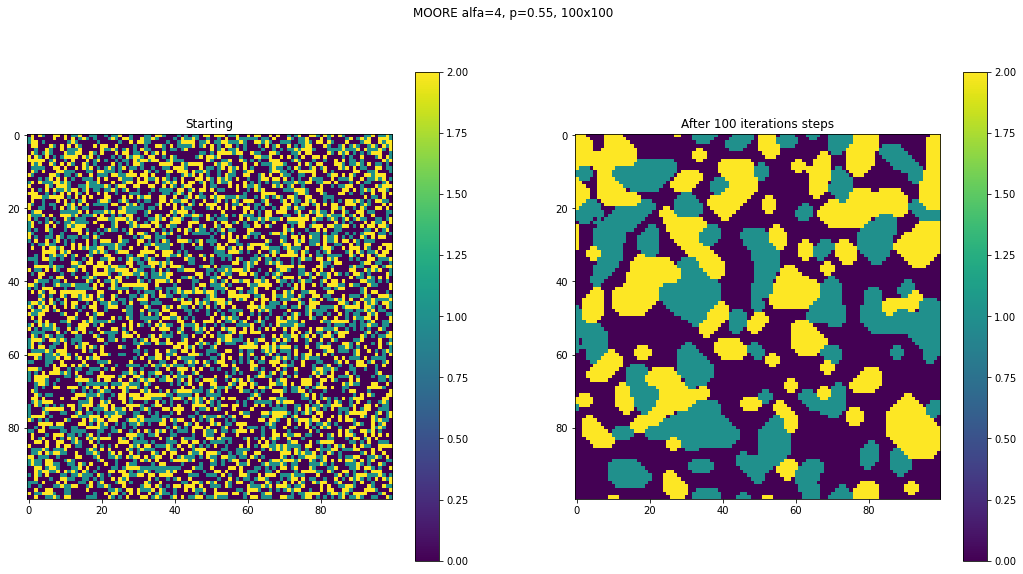

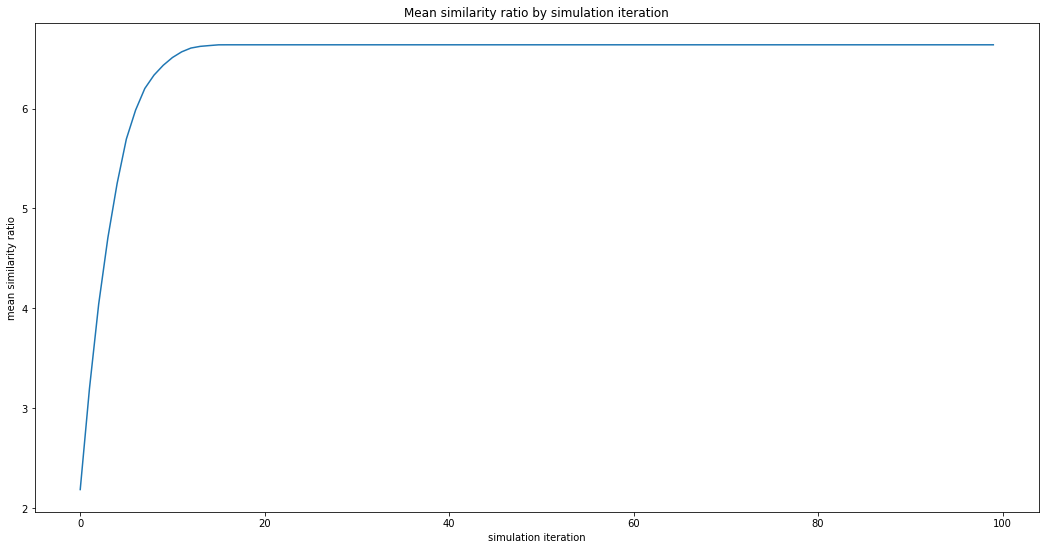

In [81]:
b = Gaylord(size=100, p=0.55, alfa=4, types_count=2)
b.run(100)
b.plot()

Model znacznie szybciej zbiega w porównaniu do poprzedniego modelu.

100%|███████████████████████████████████████████| 100/100 [00:02<00:00, 38.36it/s]


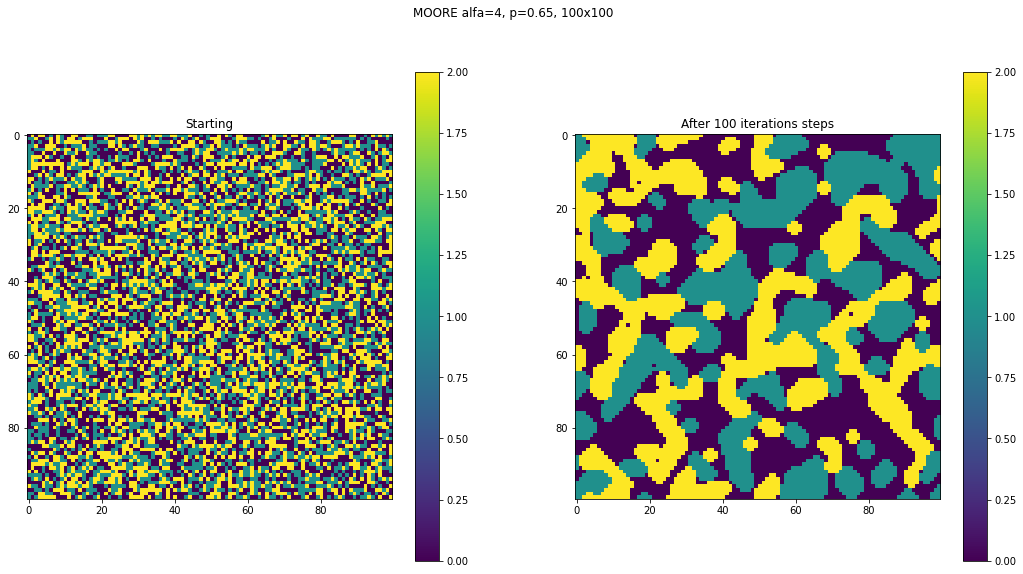

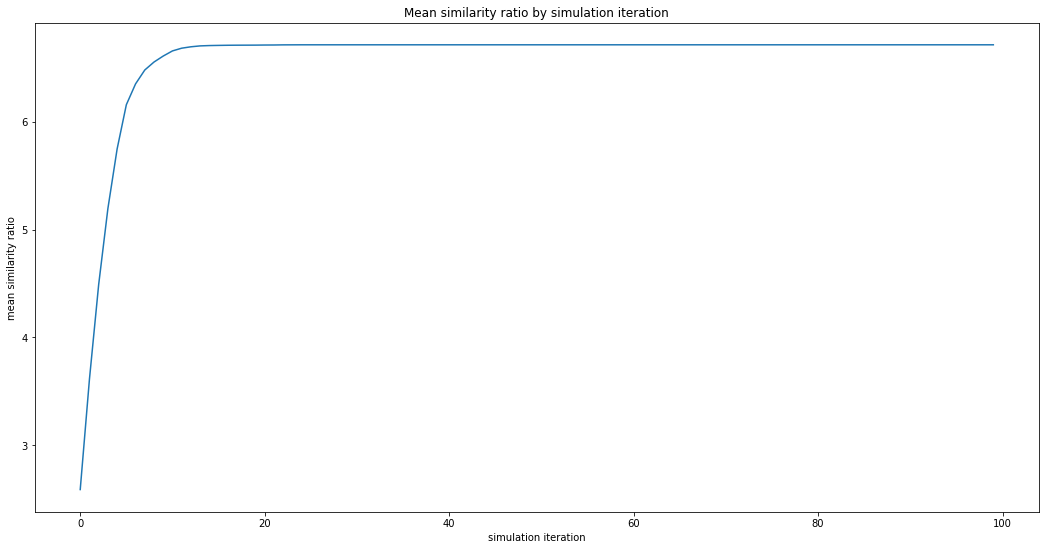

In [82]:
b = Gaylord(size=100, p=0.65, alfa=4, types_count=2)
b.run(100)
b.plot()

Model znacznie szybciej zbiega w porównaniu do poprzedniego modelu.

100%|███████████████████████████████████████████| 100/100 [00:03<00:00, 31.79it/s]


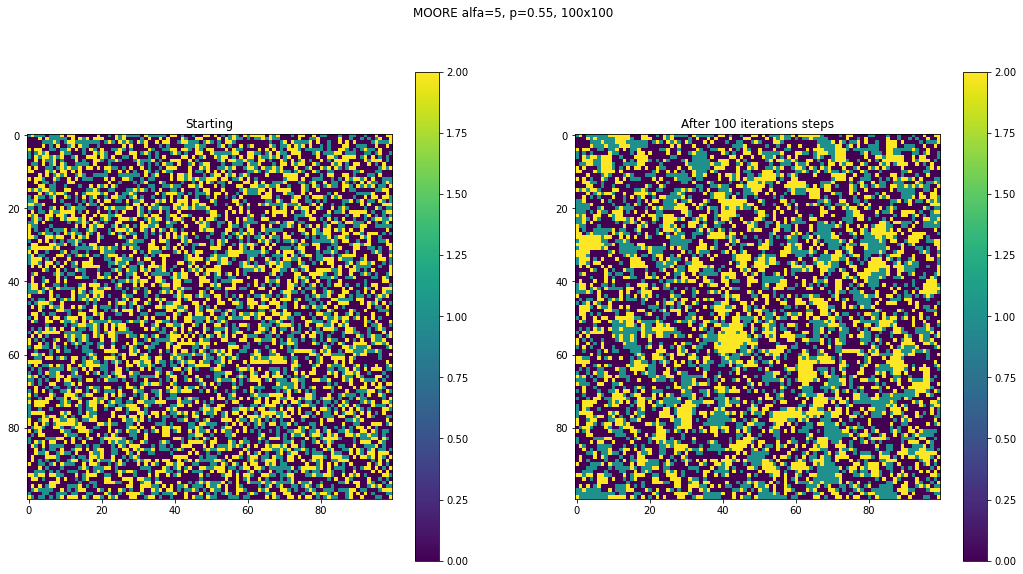

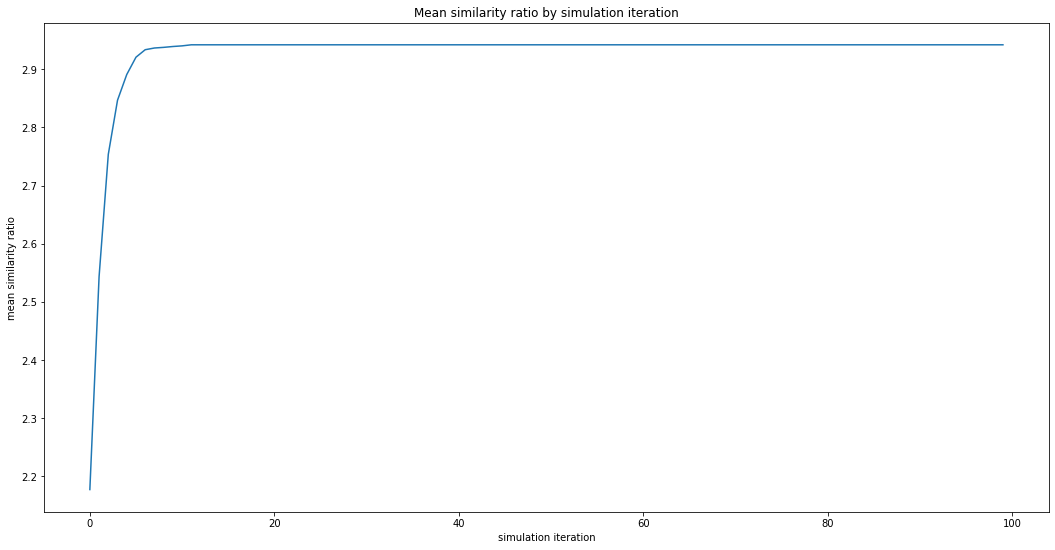

In [96]:
b = Gaylord(size=100, p=0.55, alfa=5, types_count=2)
b.run(100)
b.plot()

Przy alfa=5 nie udało się uzyskać sensownych wyników, ale widać lekką segregację

## 2. Liczba typów agentów: 4

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 681.76it/s]


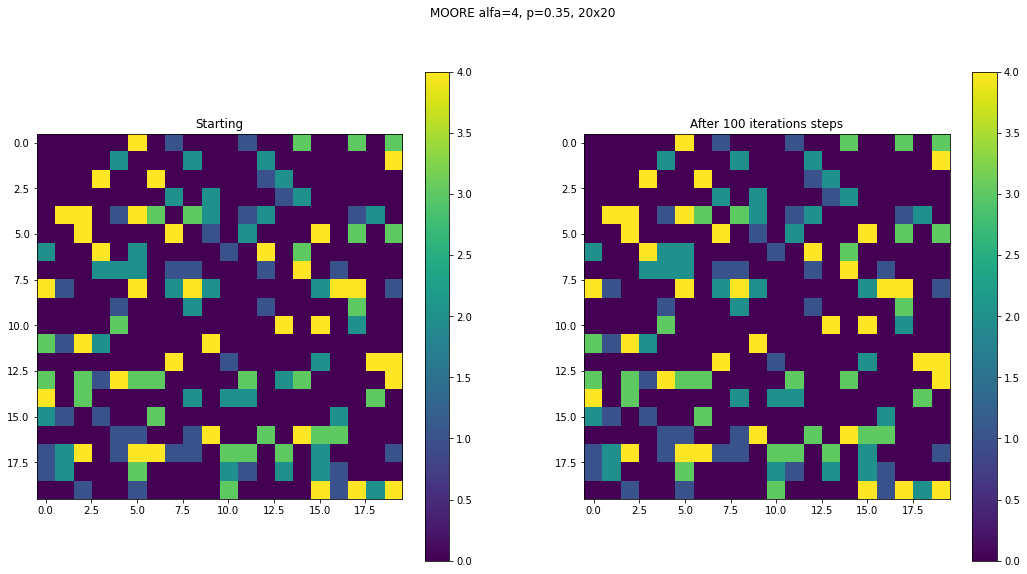

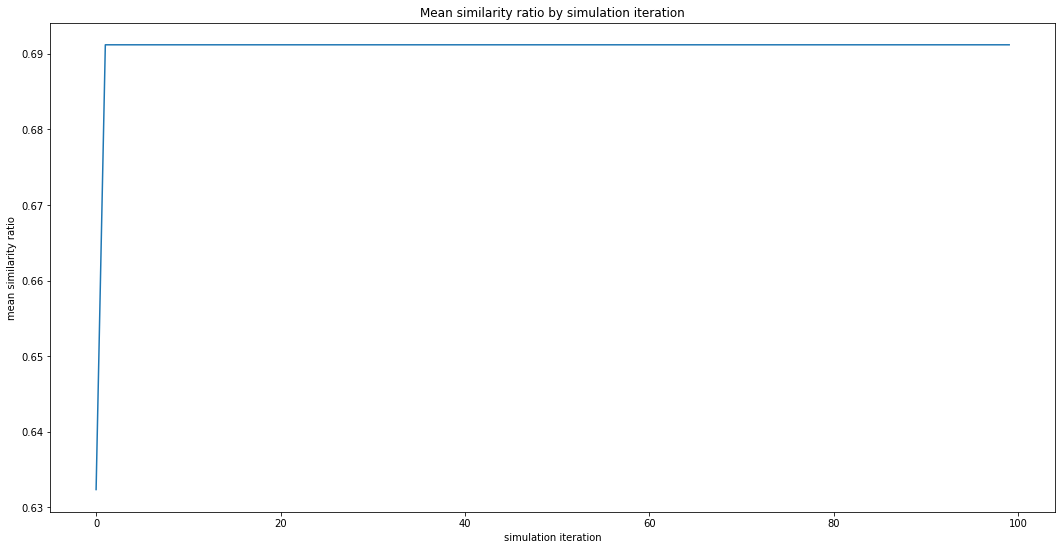

In [84]:
b = Gaylord(size=20, p=0.35, alfa=4, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 761.83it/s]


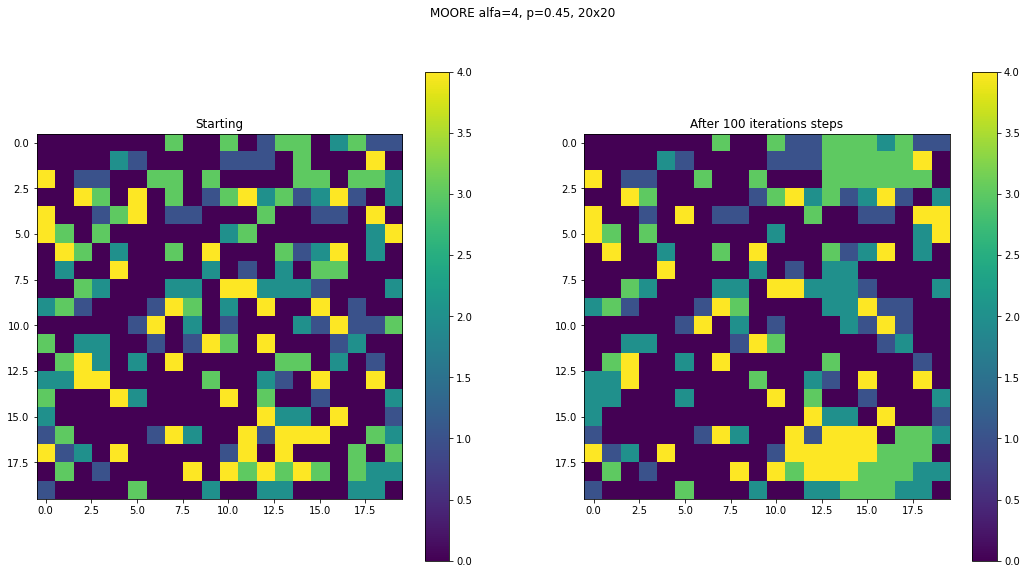

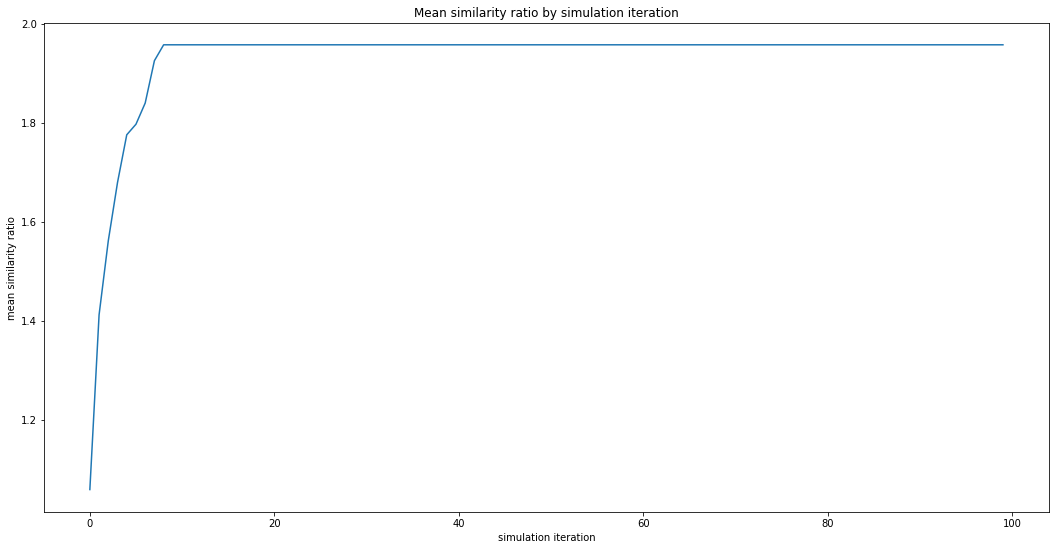

In [85]:
b = Gaylord(size=20, p=0.45, alfa=4, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 750.83it/s]


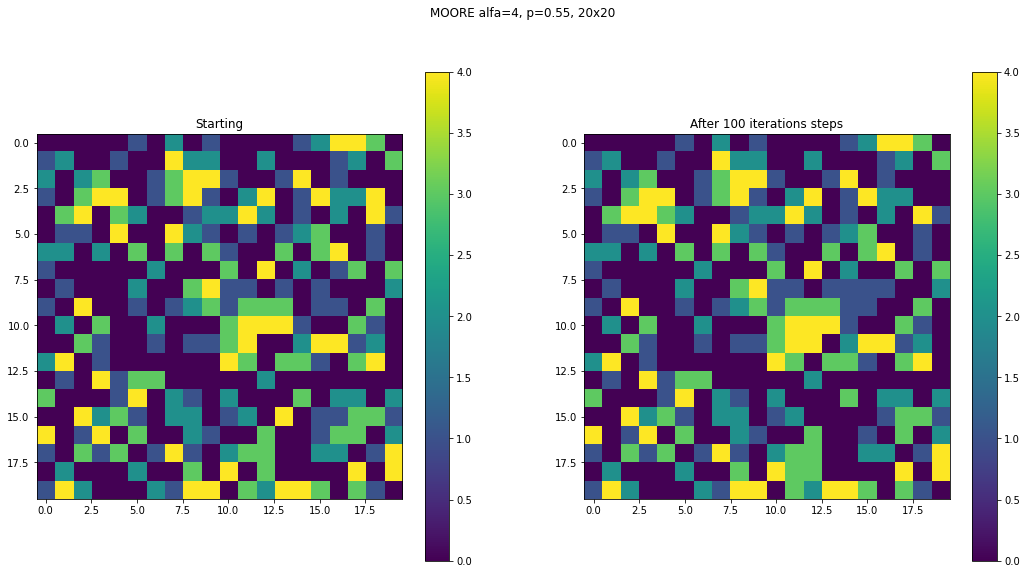

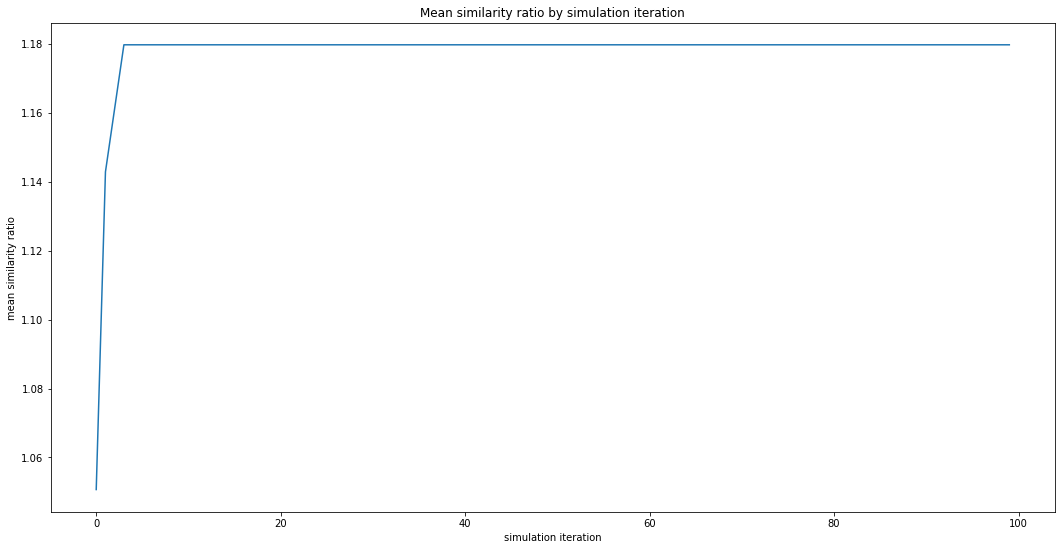

In [86]:
b = Gaylord(size=20, p=0.55, alfa=4, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 780.07it/s]


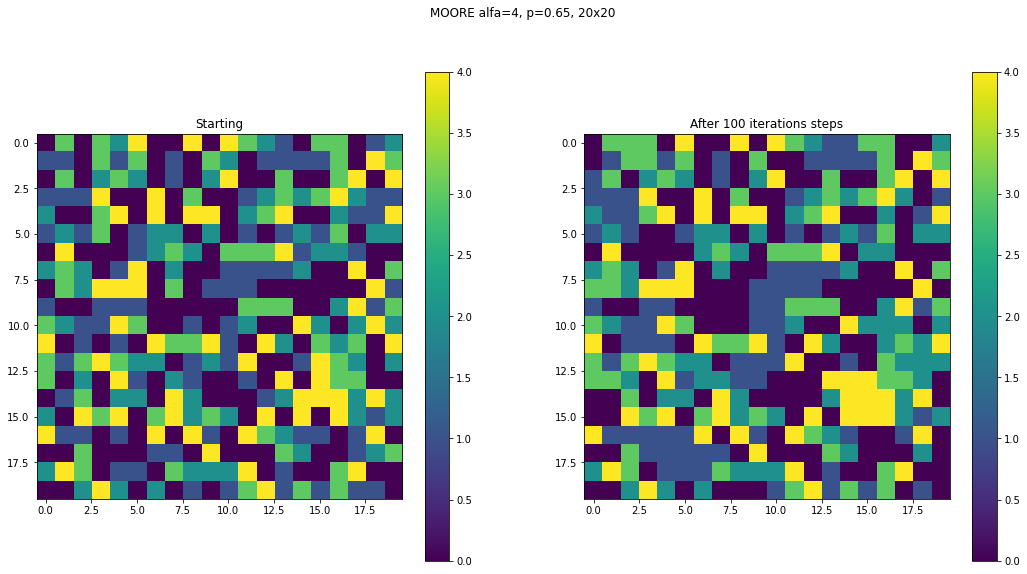

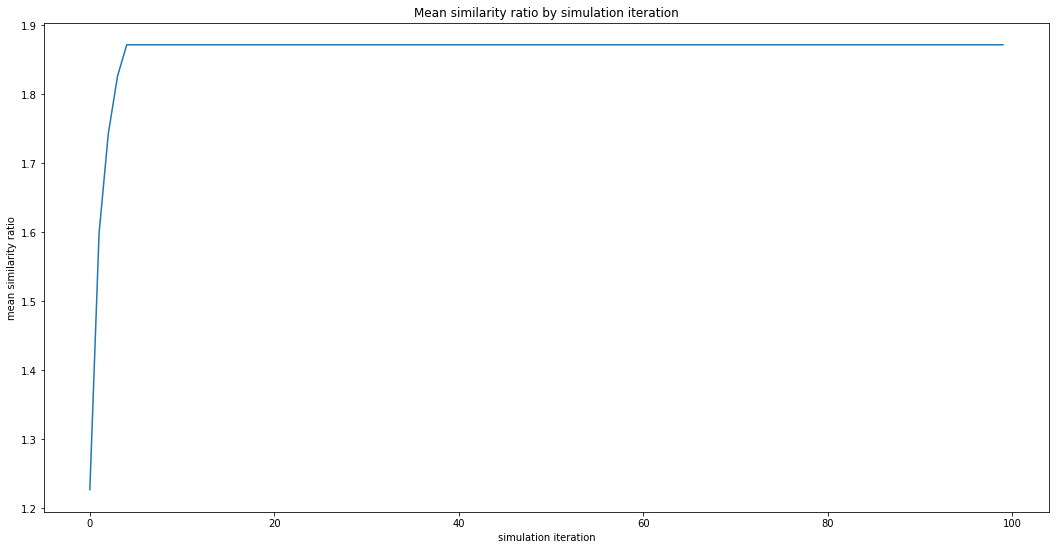

In [87]:
b = Gaylord(size=20, p=0.65, alfa=4, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników

100%|███████████████████████████████████████████| 100/100 [00:03<00:00, 30.75it/s]


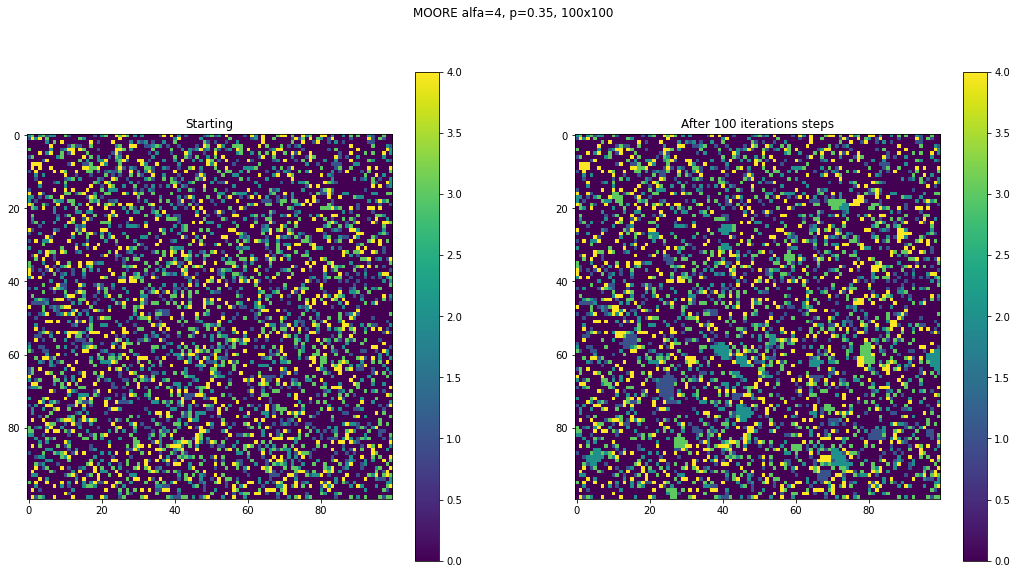

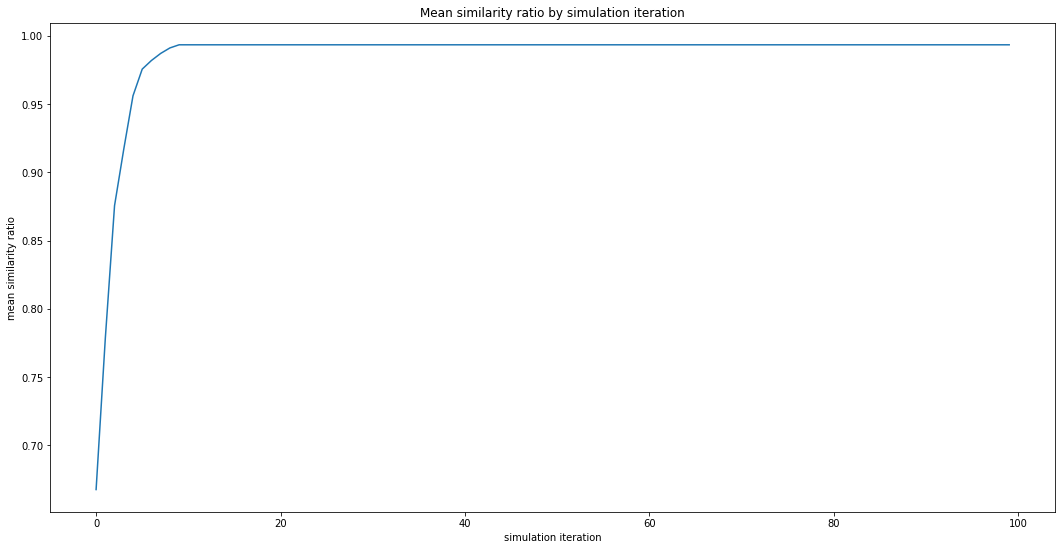

In [88]:
b = Gaylord(size=100, p=0.35, alfa=4, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników

100%|███████████████████████████████████████████| 100/100 [00:03<00:00, 29.96it/s]


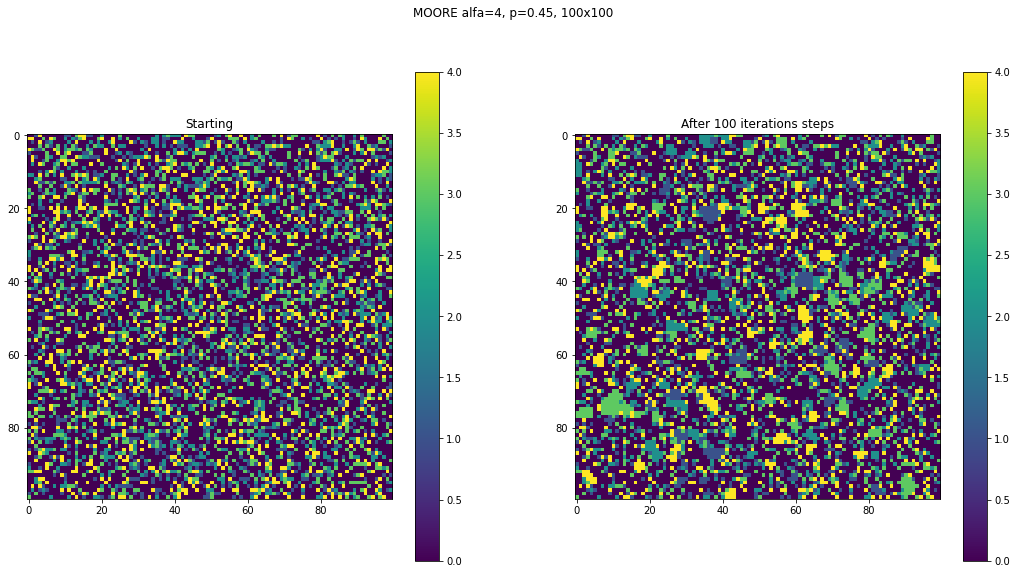

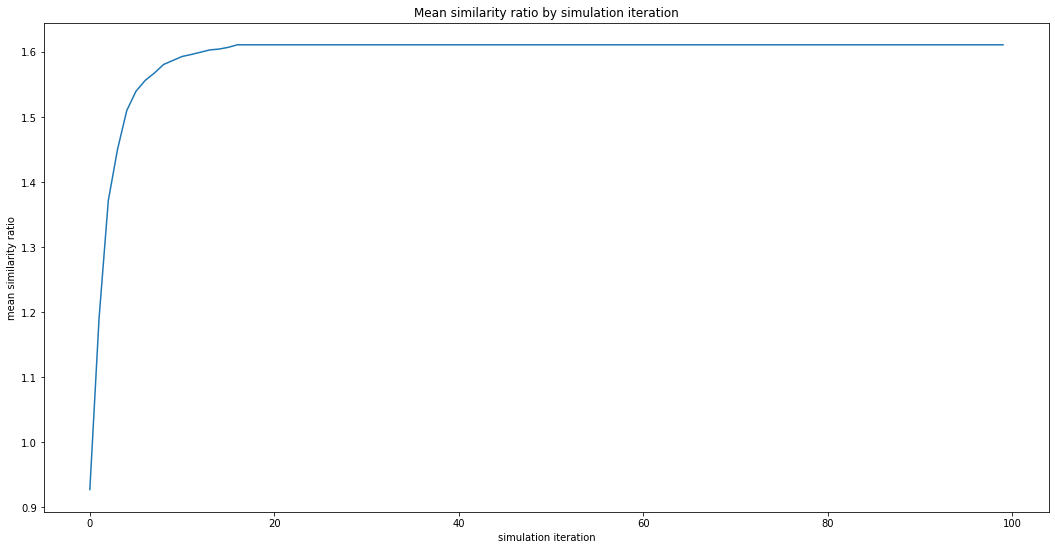

In [89]:
b = Gaylord(size=100, p=0.45, alfa=4, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników

100%|███████████████████████████████████████████| 100/100 [00:03<00:00, 30.48it/s]


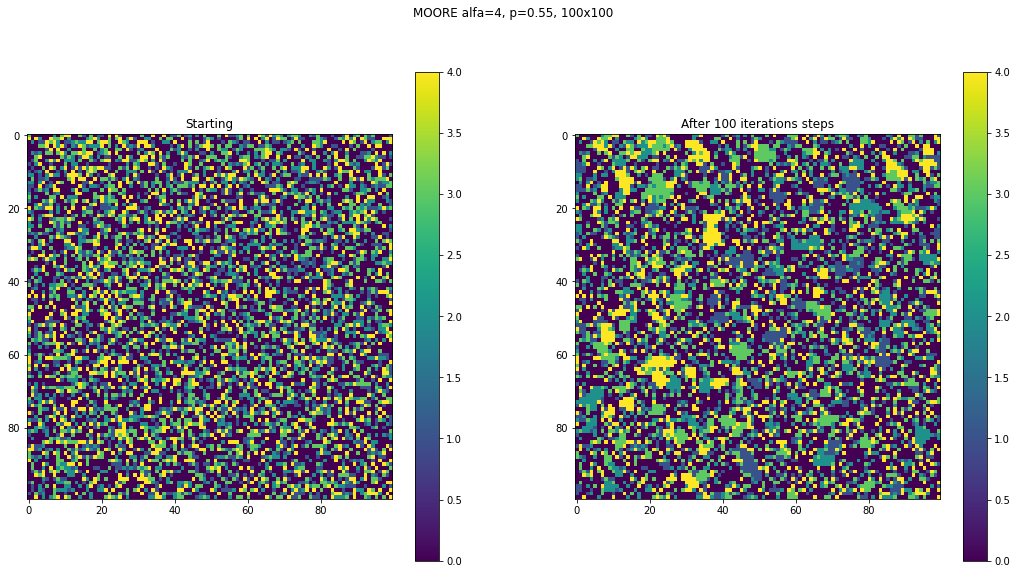

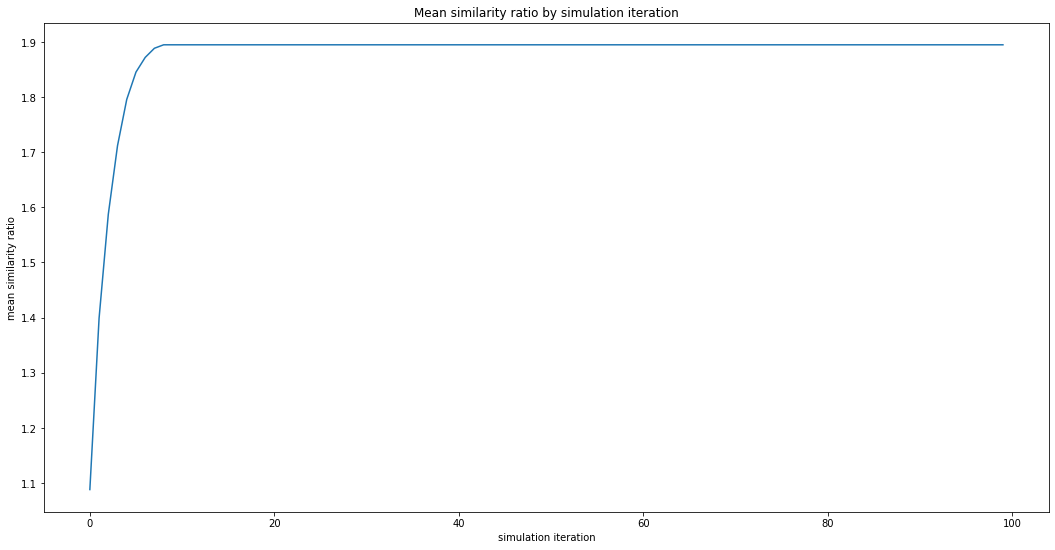

In [90]:
b = Gaylord(size=100, p=0.55, alfa=4, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników

100%|███████████████████████████████████████████| 100/100 [00:03<00:00, 31.46it/s]


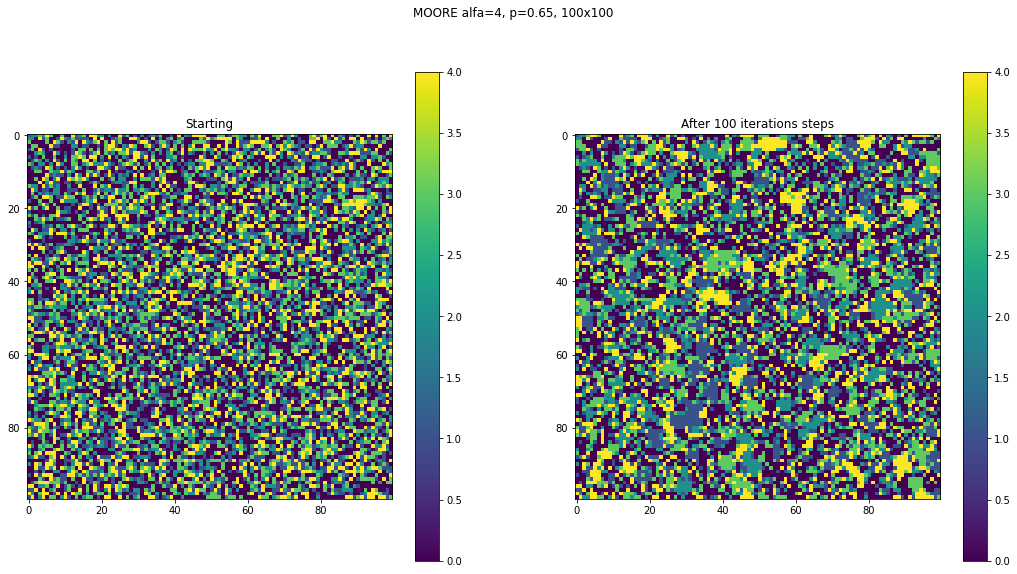

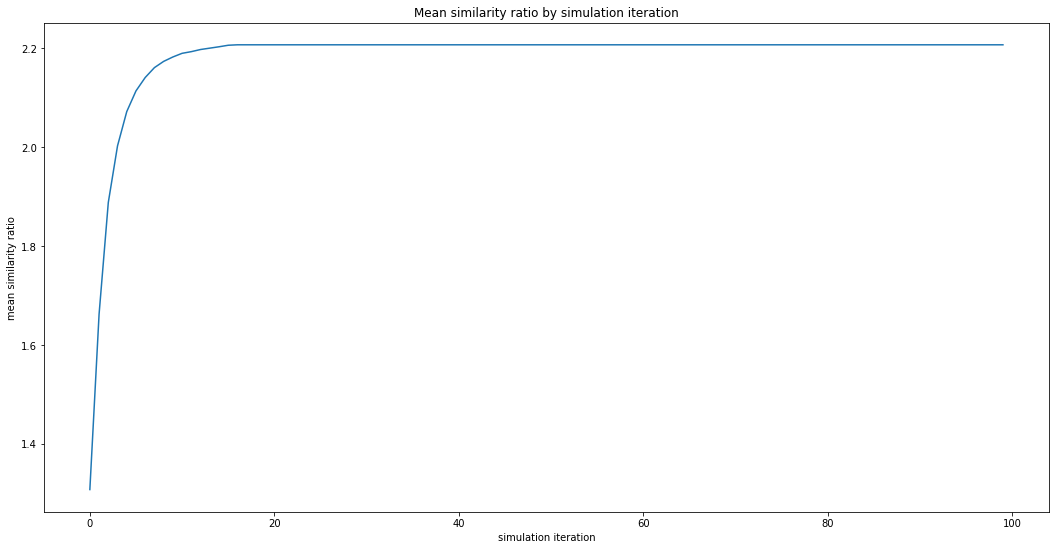

In [91]:
b = Gaylord(size=100, p=0.65, alfa=4, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników, ale widać lekką segregację.

100%|███████████████████████████████████████████| 100/100 [00:03<00:00, 29.99it/s]


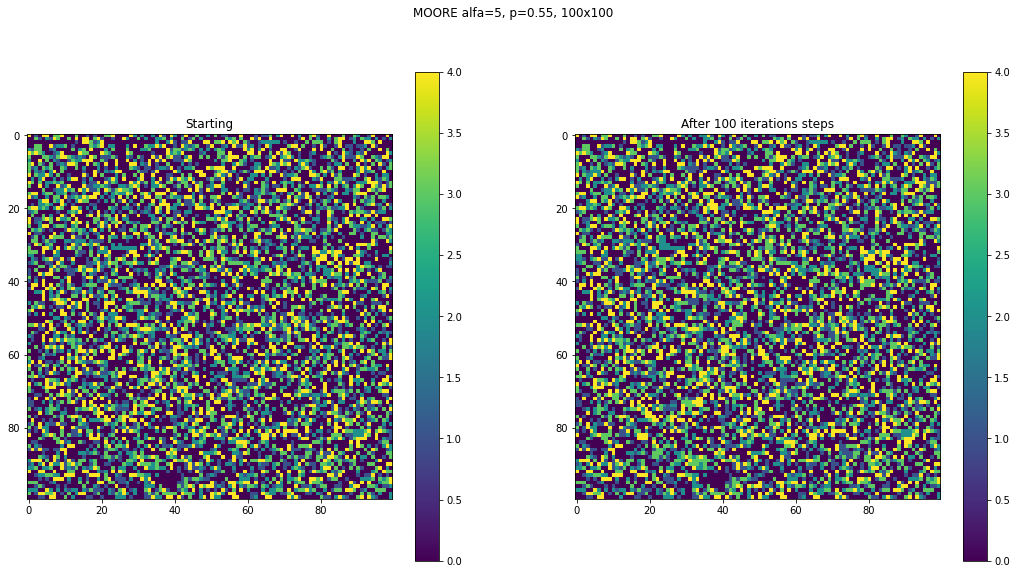

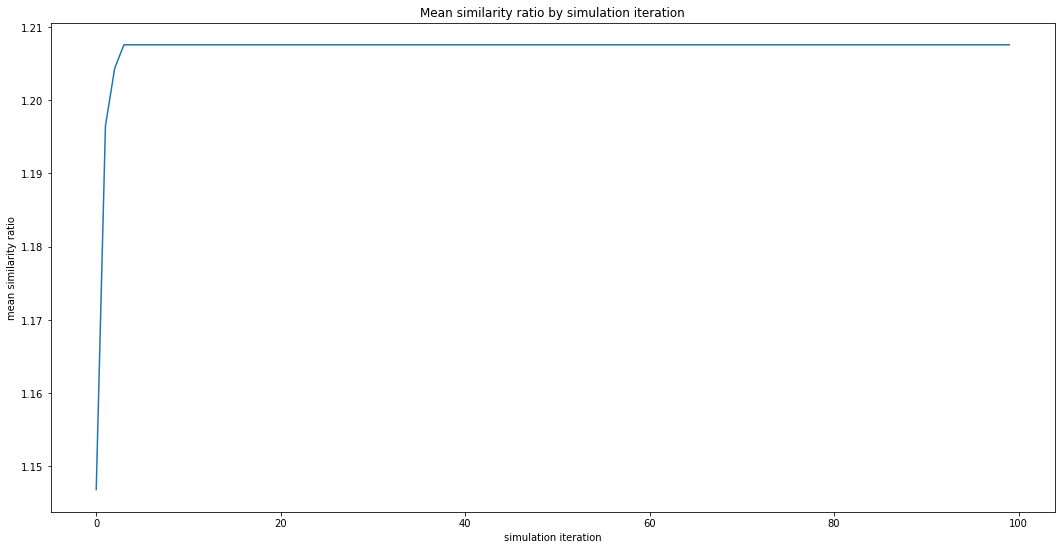

In [92]:
b = Gaylord(size=100, p=0.55, alfa=5, types_count=4)
b.run(100)
b.plot()

nie udało się uzyskać sensownych wyników. Przy 4 typach agentów, model zachowuje się gorzej w porównaniu do modelu z 1 zadania